In [1]:
import pandas as pd
import numpy as np
import os


## Find location of the graded VLS videos; create clean dataframe for future analysis

In [7]:
trach_con = pd.read_csv('/data/mskscratch/users/ghoyer/Precision_Air/Tracheal_access_comparison_Consolidated_clean_initial.csv')

trach_con = trach_con.iloc[:,0:11]

trach_con

Video_ID Santiago_Review Sean_Review  \
0   20201029-170946              2b           2   
1   20201026-094437               1           1   
2   20201011-041330              2b           2   
3   20201019-154106              2b           2   
4   20201016-124433              2d           2   
..              ...             ...         ...   
92  20200606_053830               2           2   
93  20200229-212409               1           1   
94  20200326-060122               3           3   
95  20200517-223211               2           2   
96  20200517-074312               2           2   

    Santiago_Total_time_of_attempt Sean_Total_time_of_attempt  \
0                             24.0                         15   
1                             16.0                          6   
2                             24.0                         11   
3                             43.0                         16   
4                             17.0                         10   
..                             ...                        ...   
92                            17.0                         21   
93                             8.0                          5   
94                            35.0                         13   
95                            31.0                         11   
96                            57.0                         35   

    Santiago_Total_time_of_tracheal_access Sean_Total_time_of_tracheal_access  \
0                                     17.0                                  7   
1                                     10.0                                  3   
2                                     17.0                                  5   
3                                     33.0                                 10   
4                                     13.0                                  4   
..                                     ...                                ...   
92                                    11.0                                 11   
93                                     4.0                                  2   
94                                    15.0                                  4   
95                                    16.0                                  5   
96                                    38.0                                 12   

   Santiago_new_blood_erythema Sean_new_blood_erythema Santiago_Best_CL_grade  \
0                          NaN                     NaN                      I   
1                          NaN                     NaN                      I   
2                          NaN                     NaN                    IIa   
3                          NaN                     NaN                      I   
4                          NaN                     NaN                      I   
..                         ...                     ...                    ...   
92                           N                       n                    IIa   
93                           N                       n                      I   
94                           Y                       y                    IIa   
95                           N                       n                      I   
96                           N                       n                      I   

   Sean_Best_CL_grade  
0                   1  
1                   1  
2                   2  
3                   1  
4                   2  
..                ...  
92                  2  
93                  1  
94                  1  
95                  1  
96                  1  

[97 rows x 11 columns]

In [14]:
import os
import pandas as pd

video_dir = '/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)'
sub_dir = os.path.join(video_dir, 'second 100 videos')
ext = ['.avi', '.mp4']

# List of directories to check
directories = [video_dir, sub_dir]

video_ids = []
video_paths = []
video_exts = []

for directory in directories:
    for f in os.listdir(directory):
        full_path = os.path.join(directory, f)
        if os.path.isfile(full_path) and os.path.splitext(f)[1].lower() in ext:
            name, extension = os.path.splitext(f)
            video_ids.append(name)
            video_paths.append(full_path)
            video_exts.append(extension)

df = pd.DataFrame({
    'Video_ID': video_ids,
    'Video_path': video_paths,
    'Video_ext': video_exts
})

print(df)


            Video_ID                                         Video_path  \
0    20201007-203312  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
1    20201008-065515  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
2    20201008-220801  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
3    20201008-062919  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
4    20201008-031959  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
..               ...                                                ...   
197  20200619-103110  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
198  20200730-130623  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
199  20200730-130806  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
200  20200803-065106  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
201  20200811-082926  /data/mskscratch/users/ghoyer/Precision_Air/Da...   

    Video_ext  
0        .avi  
1        .avi  
2        .avi  
3        .avi  
4        .avi  
.. 

In [15]:
video_df = df.merge(trach_con,
                    on='Video_ID',
                    how='right')

video_df



Video_ID                                         Video_path  \
0   20201029-170946  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
1   20201026-094437  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
2   20201011-041330  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
3   20201019-154106  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
4   20201016-124433  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
..              ...                                                ...   
94  20200606_053830  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
95  20200229-212409  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
96  20200326-060122  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
97  20200517-223211  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
98  20200517-074312  /data/mskscratch/users/ghoyer/Precision_Air/Da...   

   Video_ext Santiago_Review Sean_Review  Santiago_Total_time_of_attempt  \
0       .avi              2b           2                            24.0   
1       .avi               1           1                            16.0   
2       .avi              2b           2                            24.0   
3       .avi              2b           2                            43.0   
4       .avi              2d           2                            17.0   
..       ...             ...         ...                             ...   
94      .mp4               2           2                            17.0   
95      .avi               1           1                             8.0   
96      .avi               3           3                            35.0   
97      .avi               2           2                            31.0   
98      .avi               2           2                            57.0   

   Sean_Total_time_of_attempt  Santiago_Total_time_of_tracheal_access  \
0                          15                                    17.0   
1                           6                                    10.0   
2                          11                                    17.0   
3                          16                                    33.0   
4                          10                                    13.0   
..                        ...                                     ...   
94                         21                                    11.0   
95                          5                                     4.0   
96                         13                                    15.0   
97                         11                                    16.0   
98                         35                                    38.0   

   Sean_Total_time_of_tracheal_access Santiago_new_blood_erythema  \
0                                   7                         NaN   
1                                   3                         NaN   
2                                   5                         NaN   
3                                  10                         NaN   
4                                   4                         NaN   
..                                ...                         ...   
94                                 11                           N   
95                                  2                           N   
96                                  4                           Y   
97                                  5                           N   
98                                 12                           N   

   Sean_new_blood_erythema Santiago_Best_CL_grade Sean_Best_CL_grade  
0                      NaN                      I                  1  
1                      NaN                      I                  1  
2                      NaN                    IIa                  2  
3                      NaN                      I                  1  
4                      NaN                      I                  2  
..                     ...                    ...                ...  
94    

In [ ]:
# video_df.to_csv('/data/mskscratch/users/ghoyer/Precision_Air/air_loc_0308.csv', index=False)
# check = pd.read_csv('/data/mskscratch/users/ghoyer/Precision_Air/air_loc_0308.csv')

# details about the Videos


In [2]:
from moviepy.editor import VideoFileClip

In [ ]:
video_df = pd.read_csv('/data/mskscratch/users/ghoyer/Precision_Air/air_loc_0308.csv')

# Assume video_df already exists and has a 'Video_path' column
durations = []
fps_list = []
widths = []
heights = []
frame_counts = []

for path in video_df['Video_path']:
    try:
        clip = VideoFileClip(path)
        durations.append(clip.duration)
        fps_list.append(clip.fps)
        w, h = clip.size
        widths.append(w)
        heights.append(h)
        # Use the reader's nframes if available, otherwise compute manually
        if hasattr(clip.reader, 'nframes'):
            frame_counts.append(clip.reader.nframes)
        else:
            frame_counts.append(int(clip.fps * clip.duration))
        clip.reader.close()  # Free up resources
        if clip.audio:
            clip.audio.reader.close_proc()
    except Exception as e:
        durations.append(None)
        fps_list.append(None)
        widths.append(None)
        heights.append(None)
        frame_counts.append(None)

video_df['Duration_sec'] = durations
video_df['FPS'] = fps_list
video_df['Width'] = widths
video_df['Height'] = heights
video_df['Frame_Count'] = frame_counts

print(video_df)


           Video_ID                                         Video_path  \
0   20201029-170946  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
1   20201026-094437  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
2   20201011-041330  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
3   20201019-154106  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
4   20201016-124433  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
..              ...                                                ...   
94  20200606_053830  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
95  20200229-212409  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
96  20200326-060122  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
97  20200517-223211  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
98  20200517-074312  /data/mskscratch/users/ghoyer/Precision_Air/Da...   

   Video_ext Santiago_Review Sean_Review  Santiago_Total_time_of_attempt  \
0       .avi              2b       

In [ ]:
# video_df.to_csv('/data/mskscratch/users/ghoyer/Precision_Air/air_loc_duration_0308.csv', index=False)
# video_df.to_csv('/data/mskscratch/users/ghoyer/Precision_Air/air_loc_vid_details_0308.csv', index=False)

In [10]:
video_df

Video_ID                                         Video_path  \
0   20201029-170946  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
1   20201026-094437  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
2   20201011-041330  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
3   20201019-154106  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
4   20201016-124433  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
..              ...                                                ...   
94  20200606_053830  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
95  20200229-212409  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
96  20200326-060122  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
97  20200517-223211  /data/mskscratch/users/ghoyer/Precision_Air/Da...   
98  20200517-074312  /data/mskscratch/users/ghoyer/Precision_Air/Da...   

   Video_ext Santiago_Review Sean_Review  Santiago_Total_time_of_attempt  \
0       .avi              2b           2                            24.0   
1       .avi               1           1                            16.0   
2       .avi              2b           2                            24.0   
3       .avi              2b           2                            43.0   
4       .avi              2d           2                            17.0   
..       ...             ...         ...                             ...   
94      .mp4               2           2                            17.0   
95      .avi               1           1                             8.0   
96      .avi               3           3                            35.0   
97      .avi               2           2                            31.0   
98      .avi               2           2                            57.0   

   Sean_Total_time_of_attempt  Santiago_Total_time_of_tracheal_access  \
0                          15                                    17.0   
1                           6                                    10.0   
2                          11                                    17.0   
3                          16                                    33.0   
4                          10                                    13.0   
..                        ...                                     ...   
94                         21                                    11.0   
95                          5                                     4.0   
96                         13                                    15.0   
97                         11                                    16.0   
98                         35                                    38.0   

   Sean_Total_time_of_tracheal_access Santiago_new_blood_erythema  \
0                                   7                         NaN   
1                                   3                         NaN   
2                                   5                         NaN   
3                                  10                         NaN   
4                                   4                         NaN   
..                                ...                         ...   
94                                 11                           N   
95                                  2                           N   
96                                  4                           Y   
97                                  5                           N   
98                                 12                           N   

   Sean_new_blood_erythema Santiago_Best_CL_grade Sean_Best_CL_grade  \
0                      NaN                      I                  1   
1                      NaN                      I                  1   
2                      NaN                    IIa                  2   
3                      NaN                      I                  1   
4                      NaN                      I                  2   
..                     ...                    ...                ...   

# Color Analysis

now I want to do some color analysis of these videos. Context - these are videos of intubation procedures; most videos include recorded scenes prior to the actual event of interest, and sometimes after. 

In [13]:
import cv2
import numpy as np

def extract_frame_metrics(video_path):
    cap = cv2.VideoCapture(video_path)
    brightness_values = []
    contrast_values = []
    exposure_values = []
    frame_times = []
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Compute timestamp (in seconds) for the current frame
        timestamp = frame_index / fps if fps > 0 else None
        frame_times.append(timestamp)
        
        # Convert frame to grayscale for intensity calculations
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        brightness = np.mean(gray)
        contrast = np.std(gray)
        brightness_values.append(brightness)
        contrast_values.append(contrast)
        
        # Exposure is read from the capture device; for files this is often constant
        exposure = cap.get(cv2.CAP_PROP_EXPOSURE)
        exposure_values.append(exposure)
        
        frame_index += 1
        
    cap.release()
    return frame_times, brightness_values, contrast_values, exposure_values

# # Example usage for one video:
# video_path_example = video_df['Video_path'].iloc[0]
# times, brightness, contrast, exposure = extract_frame_metrics(video_path_example)

# print("Frame times (sec):", times)
# print("Brightness values:", brightness)
# print("Contrast values:", contrast)
# print("Exposure values:", exposure)


In [15]:
video_df['Video_ID'].iloc[0]

'20201029-170946'

Frame times (sec): [0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0, 1.0666666666666667, 1.1333333333333333, 1.2, 1.2666666666666666, 1.3333333333333333, 1.4, 1.4666666666666666, 1.5333333333333334, 1.6, 1.6666666666666667, 1.7333333333333334, 1.8, 1.8666666666666667, 1.9333333333333333, 2.0, 2.066666666666667, 2.1333333333333333, 2.2, 2.2666666666666666, 2.3333333333333335, 2.4, 2.466666666666667, 2.533333333333333, 2.6, 2.6666666666666665, 2.7333333333333334, 2.8, 2.8666666666666667, 2.933333333333333, 3.0, 3.066666666666667, 3.1333333333333333, 3.2, 3.2666666666666666, 3.3333333333333335, 3.4, 3.466666666666667, 3.533333333333333, 3.6, 3.6666666666666665, 3.7333333333333334, 3.8, 3.8666666666666667, 3.933333333333333, 4.0, 4.066666666666666, 4.133333333333334, 4.2, 4.266666666666667, 4.333333333333333,

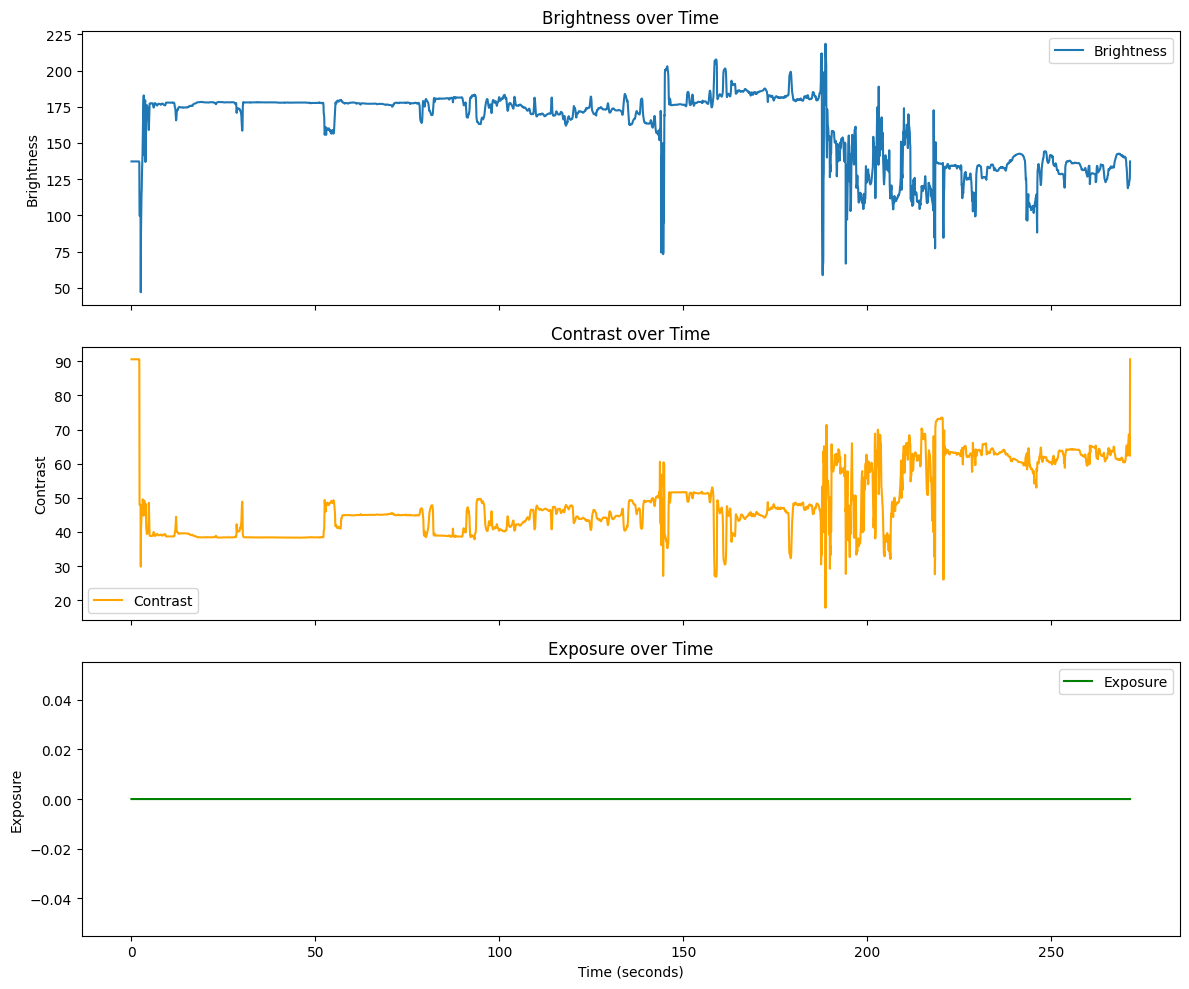

In [14]:
import matplotlib.pyplot as plt

# Extract metrics for one video using the previously defined function
video_path_example = video_df['Video_path'].iloc[0]
times, brightness, contrast, exposure = extract_frame_metrics(video_path_example)

print("Frame times (sec):", times)
print("Brightness values:", brightness)
print("Contrast values:", contrast)
print("Exposure values:", exposure)

# Create a figure with three subplots sharing the same time axis
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot brightness over time
axs[0].plot(times, brightness, label='Brightness')
axs[0].set_ylabel('Brightness')
axs[0].set_title('Brightness over Time')
axs[0].legend()

# Plot contrast over time
axs[1].plot(times, contrast, label='Contrast', color='orange')
axs[1].set_ylabel('Contrast')
axs[1].set_title('Contrast over Time')
axs[1].legend()

# Plot exposure over time
axs[2].plot(times, exposure, label='Exposure', color='green')
axs[2].set_ylabel('Exposure')
axs[2].set_xlabel('Time (seconds)')
axs[2].set_title('Exposure over Time')
axs[2].legend()

plt.tight_layout()
plt.show()


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_color_metrics(video_path):
    cap = cv2.VideoCapture(video_path)
    times = []
    avg_hues = []
    avg_sats = []
    avg_vals = []
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_index = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        timestamp = frame_index / fps if fps > 0 else None
        times.append(timestamp)
        
        # Convert frame from BGR to HSV
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        avg_hue = hsv_frame[:, :, 0].mean()
        avg_sat = hsv_frame[:, :, 1].mean()
        avg_val = hsv_frame[:, :, 2].mean()
        
        avg_hues.append(avg_hue)
        avg_sats.append(avg_sat)
        avg_vals.append(avg_val)
        
        frame_index += 1
        
    cap.release()
    return times, avg_hues, avg_sats, avg_vals



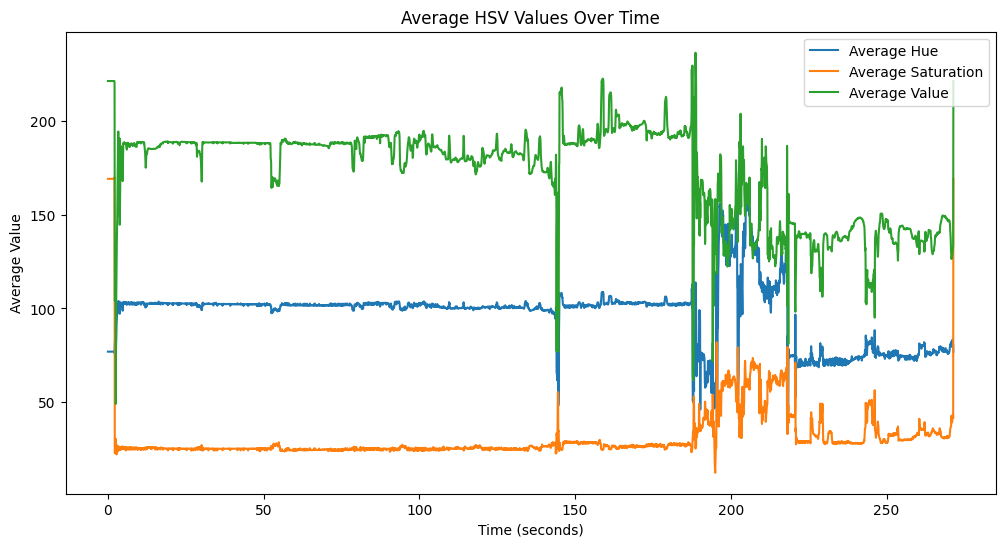

In [17]:

# Example usage for one video
video_path_example = video_df['Video_path'].iloc[0]
times, avg_hues, avg_sats, avg_vals = extract_color_metrics(video_path_example)

# Plotting the average HSV values over time
plt.figure(figsize=(12,6))
plt.plot(times, avg_hues, label='Average Hue')
plt.plot(times, avg_sats, label='Average Saturation')
plt.plot(times, avg_vals, label='Average Value')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Value')
plt.title('Average HSV Values Over Time')
plt.legend()
plt.show()

Hex color codes for frames between 196s and 217s:
Frame 2940 at time 196.00s -> #8d8da5
Frame 2941 at time 196.07s -> #8f8ba3
Frame 2942 at time 196.13s -> #9c90a9
Frame 2943 at time 196.20s -> #9c8da8
Frame 2944 at time 196.27s -> #9783a1
Frame 2945 at time 196.33s -> #9d7c9d
Frame 2946 at time 196.40s -> #9c7b98
Frame 2947 at time 196.47s -> #9e7b9b
Frame 2948 at time 196.53s -> #b390ad
Frame 2949 at time 196.60s -> #b694b3
Frame 2950 at time 196.67s -> #b593b0
Frame 2951 at time 196.73s -> #b494b3
Frame 2952 at time 196.80s -> #ae96b4
Frame 2953 at time 196.87s -> #b196b4
Frame 2954 at time 196.93s -> #ac8bad
Frame 2955 at time 197.00s -> #947799
Frame 2956 at time 197.07s -> #816b8c
Frame 2957 at time 197.13s -> #826d8e
Frame 2958 at time 197.20s -> #806d8d
Frame 2959 at time 197.27s -> #837090
Frame 2960 at time 197.33s -> #947492
Frame 2961 at time 197.40s -> #866c8e
Frame 2962 at time 197.47s -> #8b6c8e
Frame 2963 at time 197.53s -> #8b6b8c
Frame 2964 at time 197.60s -> #816686


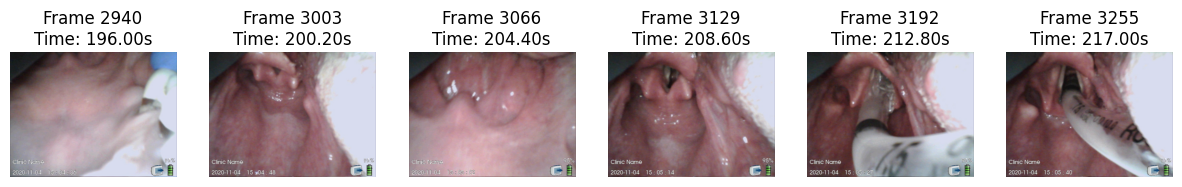

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hsv_to_hex(h, s, v):
    """
    Convert a single HSV triplet (0-179 for H, 0-255 for S, 0-255 for V)
    into a hex color code. This treats the HSV triplet as an 8-bit image,
    converts it to BGR, then forms a hex string.
    """
    hsv_uint8 = np.array([h, s, v], dtype=np.uint8).reshape((1,1,3))
    bgr_uint8 = cv2.cvtColor(hsv_uint8, cv2.COLOR_HSV2BGR)
    b, g, r = bgr_uint8[0,0]
    return f'#{r:02x}{g:02x}{b:02x}'

# Assume you have these arrays from extract_color_metrics(video_path_example)
# times, avg_hues, avg_sats, avg_vals

start_sec = 196
end_sec = 217

# Identify the indices of frames that fall within your chosen time window
indices_in_range = [
    i for i, t in enumerate(times) 
    if t is not None and t >= start_sec and t <= end_sec
]

# Convert the average HSV of each relevant frame to a hex color
hex_codes = [
    hsv_to_hex(avg_hues[i], avg_sats[i], avg_vals[i]) 
    for i in indices_in_range
]

# Print the hex codes for reference
print("Hex color codes for frames between 196s and 217s:")
for i, code in zip(indices_in_range, hex_codes):
    print(f"Frame {i} at time {times[i]:.2f}s -> {code}")

# Open the video again to read actual frames for visual confirmation
# video_path_example = '/path/to/your/video.mp4'  # Update with the correct path
video_path_example = video_df['Video_path'].iloc[0]

cap = cv2.VideoCapture(video_path_example)

# Choose how many frames to display (e.g., 5). If more frames are found, sample them.
num_frames_to_display = 5
if len(indices_in_range) > num_frames_to_display:
    step = len(indices_in_range) // num_frames_to_display
    display_indices = indices_in_range[::step]
else:
    display_indices = indices_in_range

fig, axs = plt.subplots(1, len(display_indices), figsize=(15, 5))

for ax, frame_idx in zip(axs, display_indices):
    # Move to the specific frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ax.imshow(frame_rgb)
        ax.set_title(f"Frame {frame_idx}\nTime: {times[frame_idx]:.2f}s")
    ax.axis('off')

cap.release()
plt.show()


Hex color codes for frames between 196s and 217s:
Frame 2925 at time 195.00s -> #979e97
Frame 2926 at time 195.07s -> #8d978d
Frame 2927 at time 195.13s -> #7e897d
Frame 2928 at time 195.20s -> #778173
Frame 2929 at time 195.27s -> #788174
Frame 2930 at time 195.33s -> #889687
Frame 2931 at time 195.40s -> #74748d
Frame 2932 at time 195.47s -> #567f6f
Frame 2933 at time 195.53s -> #6d7659
Frame 2934 at time 195.60s -> #6a7f5c
Frame 2935 at time 195.67s -> #798c6d
Frame 2936 at time 195.73s -> #7b9a84
Frame 2937 at time 195.80s -> #88a1a6
Frame 2938 at time 195.87s -> #88a7a6
Frame 2939 at time 195.93s -> #919fab
Frame 2940 at time 196.00s -> #8d8da5
Frame 2941 at time 196.07s -> #8f8ba3
Frame 2942 at time 196.13s -> #9c90a9
Frame 2943 at time 196.20s -> #9c8da8
Frame 2944 at time 196.27s -> #9783a1
Frame 2945 at time 196.33s -> #9d7c9d
Frame 2946 at time 196.40s -> #9c7b98
Frame 2947 at time 196.47s -> #9e7b9b
Frame 2948 at time 196.53s -> #b390ad
Frame 2949 at time 196.60s -> #b694b3


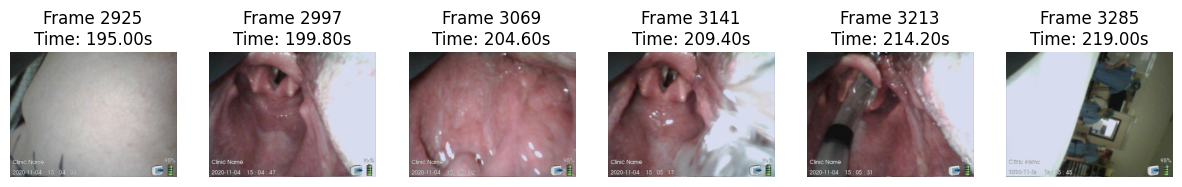

In [21]:

start_sec = 195
end_sec = 219

# Identify the indices of frames that fall within your chosen time window
indices_in_range = [
    i for i, t in enumerate(times) 
    if t is not None and t >= start_sec and t <= end_sec
]

# Convert the average HSV of each relevant frame to a hex color
hex_codes = [
    hsv_to_hex(avg_hues[i], avg_sats[i], avg_vals[i]) 
    for i in indices_in_range
]

# Print the hex codes for reference
print("Hex color codes for frames between 196s and 217s:")
for i, code in zip(indices_in_range, hex_codes):
    print(f"Frame {i} at time {times[i]:.2f}s -> {code}")

# Open the video again to read actual frames for visual confirmation
# video_path_example = '/path/to/your/video.mp4'  # Update with the correct path
video_path_example = video_df['Video_path'].iloc[0]

cap = cv2.VideoCapture(video_path_example)

# Choose how many frames to display (e.g., 5). If more frames are found, sample them.
num_frames_to_display = 5
if len(indices_in_range) > num_frames_to_display:
    step = len(indices_in_range) // num_frames_to_display
    display_indices = indices_in_range[::step]
else:
    display_indices = indices_in_range

fig, axs = plt.subplots(1, len(display_indices), figsize=(15, 5))

for ax, frame_idx in zip(axs, display_indices):
    # Move to the specific frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ax.imshow(frame_rgb)
        ax.set_title(f"Frame {frame_idx}\nTime: {times[frame_idx]:.2f}s")
    ax.axis('off')

cap.release()
plt.show()

combine into single viz tool:

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_video_metrics_single_plot(
    video_path, 
    start_sec, 
    end_sec, 
    num_frames_to_display=5
):
    """
    This function:
      1. Extracts brightness, contrast, average hue, average saturation, and average value
         over time from the given video.
      2. Plots these metrics on a single figure for the entire video duration, 
         with vertical lines indicating the user-specified start_sec and end_sec.
      3. Displays a subset of frames within the time window closest to the start_sec and end_sec.
    """
    
    # Extract metrics for every frame.
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    times = []
    brightness_list = []
    contrast_list = []
    hue_list = []
    sat_list = []
    val_list = []

    frame_index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        timestamp = frame_index / fps if fps > 0 else None
        times.append(timestamp)
        
        # Compute brightness (mean) and contrast (std) from grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        brightness_list.append(np.mean(gray))
        contrast_list.append(np.std(gray))
        
        # Convert frame to HSV and compute average H, S, and V
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        hue_list.append(hsv_frame[:, :, 0].mean())
        sat_list.append(hsv_frame[:, :, 1].mean())
        val_list.append(hsv_frame[:, :, 2].mean())

        frame_index += 1
    
    cap.release()

    # Plot all metrics on a single figure
    plt.figure(figsize=(12, 6))
    plt.plot(times, brightness_list, color="blue", label="Brightness")
    plt.plot(times, contrast_list, color="orange", label="Contrast")
    plt.plot(times, hue_list, color="green", label="Hue")
    plt.plot(times, sat_list, color="purple", label="Saturation")
    plt.plot(times, val_list, color="brown", label="Value")

    # Add vertical lines at the user-specified start and end times
    plt.axvline(start_sec, color='red', linestyle='--', label="Start/End Range")
    plt.axvline(end_sec, color='red', linestyle='--')

    plt.xlabel("Time (seconds)")
    plt.ylabel("Metric Value")
    plt.title("Video Metrics Over Time (Single Plot)")
    plt.legend()
    plt.show()

    # Find the frame indices closest to start_sec and end_sec
    times_arr = np.array(times)
    start_idx = int(np.argmin(np.abs(times_arr - start_sec)))
    end_idx = int(np.argmin(np.abs(times_arr - end_sec)))
    if start_idx > end_idx:
        start_idx, end_idx = end_idx, start_idx
    indices_in_range = list(range(start_idx, end_idx + 1))

    # Display a subset of frames from the selected time window
    if indices_in_range:
        cap = cv2.VideoCapture(video_path)

        if len(indices_in_range) > num_frames_to_display:
            step = max(1, len(indices_in_range) // num_frames_to_display)
            display_indices = indices_in_range[::step]
        else:
            display_indices = indices_in_range
        
        fig2, axs2 = plt.subplots(1, len(display_indices), figsize=(15, 5))

        # If only one frame is to be displayed, wrap axs2 in a list
        if len(display_indices) == 1:
            axs2 = [axs2]

        for ax, frame_idx in zip(axs2, display_indices):
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            if ret:
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                ax.imshow(frame_rgb)
                ax.set_title(f"Frame {frame_idx}\nTime: {times[frame_idx]:.2f}s")
            ax.axis('off')
        
        plt.show()
        cap.release()
    else:
        print(f"No frames found between {start_sec} and {end_sec} seconds.")


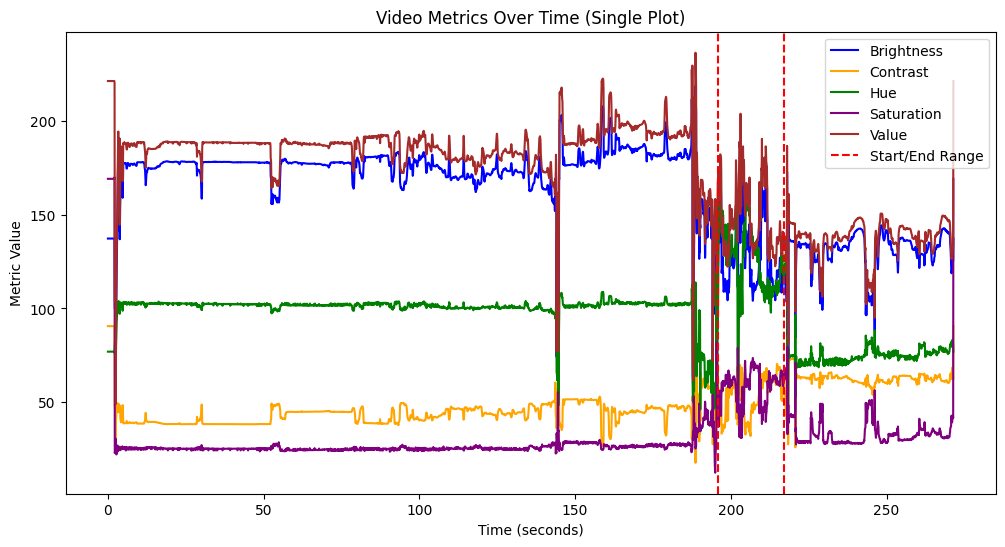

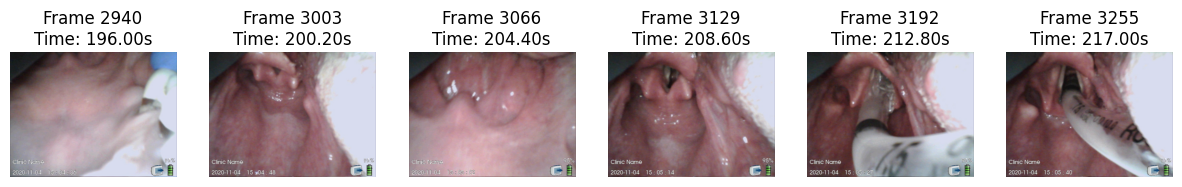

In [26]:
video_path_example = video_df['Video_path'].iloc[0]  # or any valid path
analyze_video_metrics_single_plot(
    video_path_example,
    start_sec=196,
    end_sec=217,
    num_frames_to_display=5
)


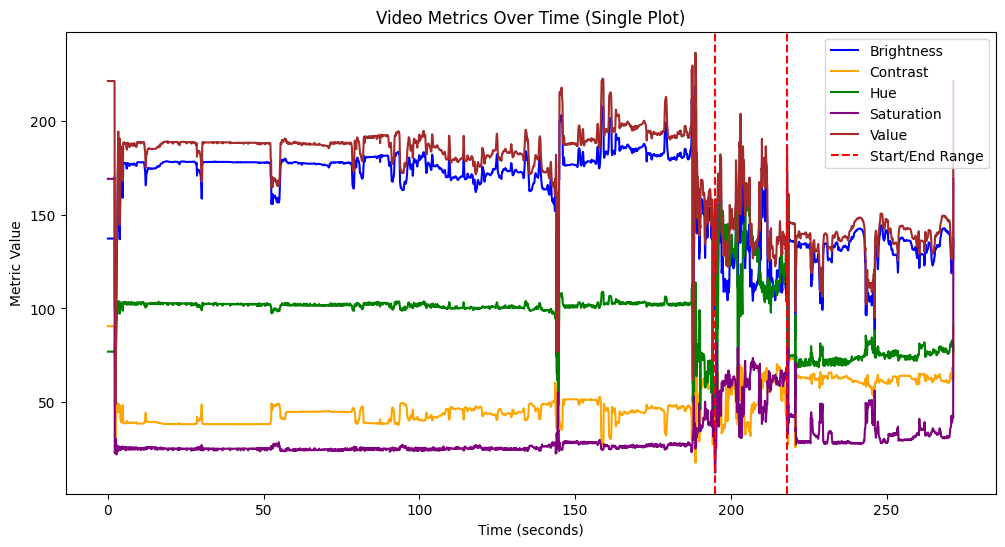

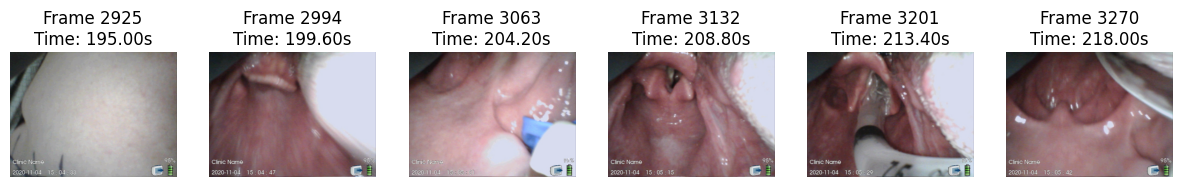

In [30]:
video_path_example = video_df['Video_path'].iloc[0]  # or any valid path
analyze_video_metrics_single_plot(
    video_path_example,
    start_sec=195,
    end_sec=218,
    num_frames_to_display=5
)


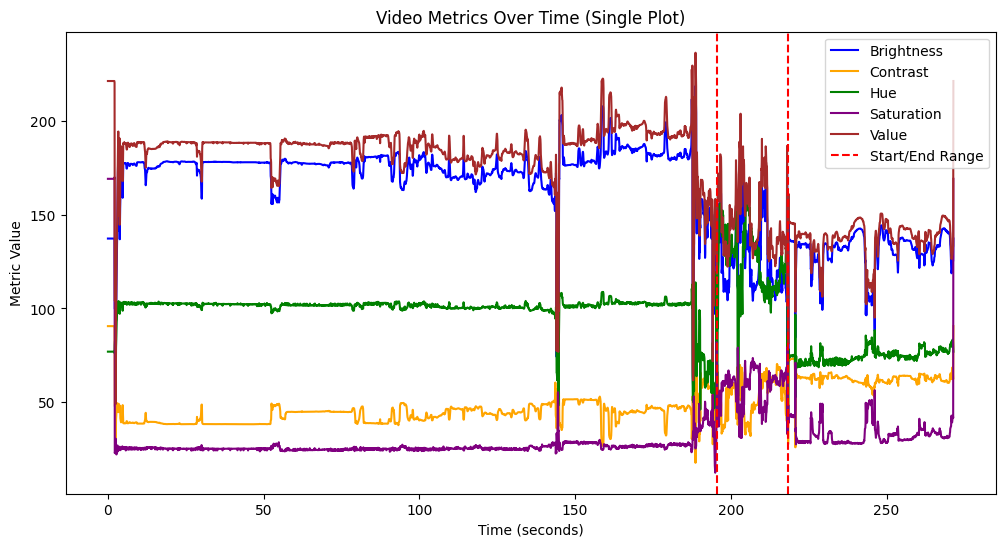

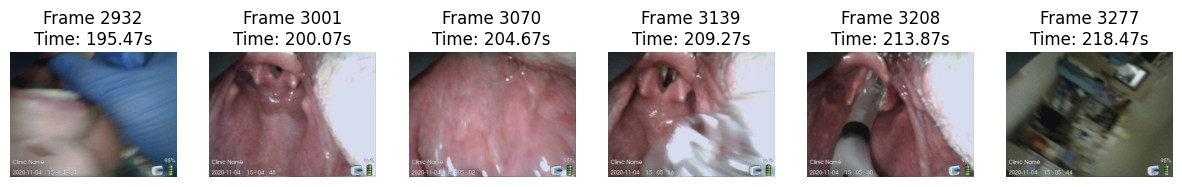

In [31]:
video_path_example = video_df['Video_path'].iloc[0]  # or any valid path
analyze_video_metrics_single_plot(
    video_path_example,
    start_sec=195.5,
    end_sec=218.5,
    num_frames_to_display=5
)


extend exploration to additional video cases

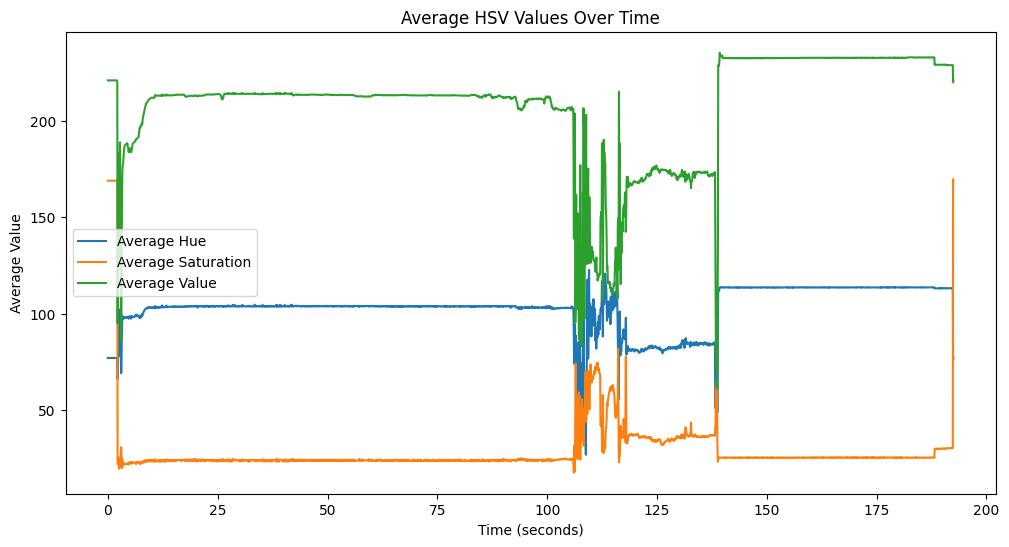

In [32]:

# Example usage for one video
video_path_example = video_df['Video_path'].iloc[1]
times, avg_hues, avg_sats, avg_vals = extract_color_metrics(video_path_example)

# Plotting the average HSV values over time
plt.figure(figsize=(12,6))
plt.plot(times, avg_hues, label='Average Hue')
plt.plot(times, avg_sats, label='Average Saturation')
plt.plot(times, avg_vals, label='Average Value')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Value')
plt.title('Average HSV Values Over Time')
plt.legend()
plt.show()

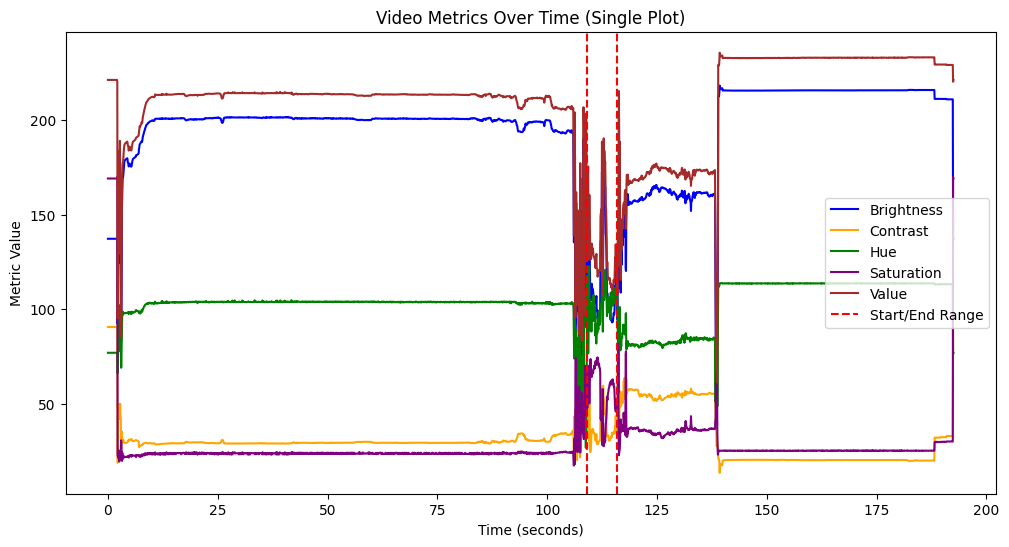

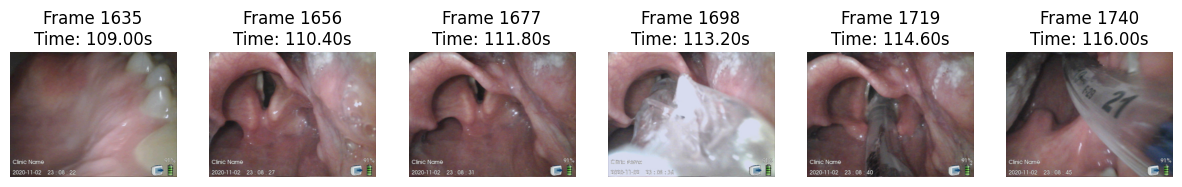

In [39]:
video_path_example = video_df['Video_path'].iloc[1]  # or any valid path
analyze_video_metrics_single_plot(
    video_path_example,
    start_sec=109,
    end_sec=116,
    num_frames_to_display=5
)

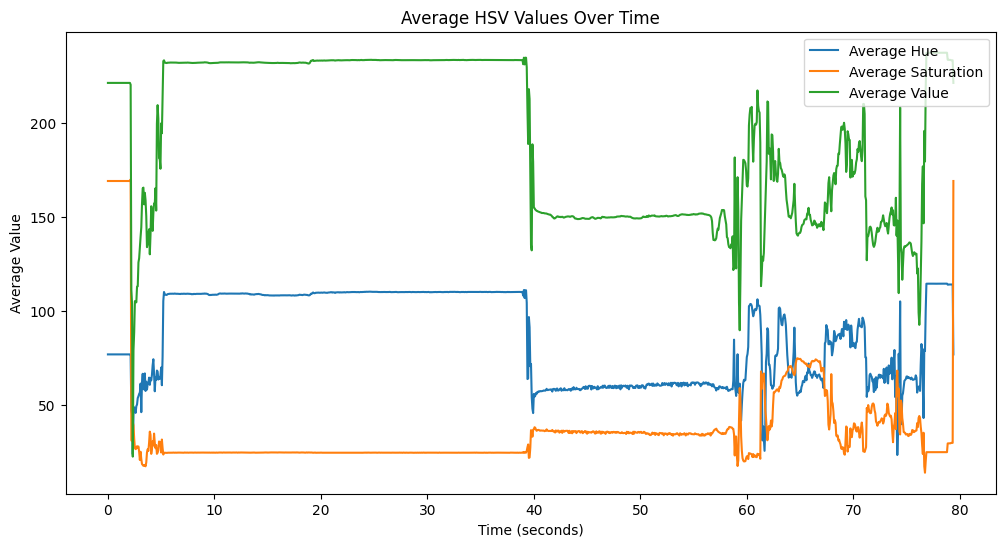

In [40]:

# Example usage for one video
video_path_example = video_df['Video_path'].iloc[2]
times, avg_hues, avg_sats, avg_vals = extract_color_metrics(video_path_example)

# Plotting the average HSV values over time
plt.figure(figsize=(12,6))
plt.plot(times, avg_hues, label='Average Hue')
plt.plot(times, avg_sats, label='Average Saturation')
plt.plot(times, avg_vals, label='Average Value')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Value')
plt.title('Average HSV Values Over Time')
plt.legend()
plt.show()

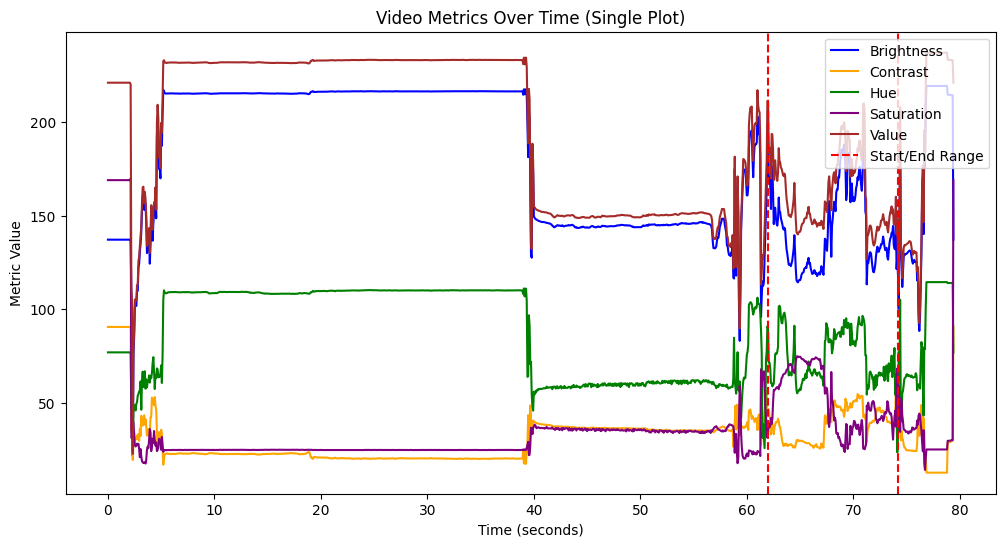

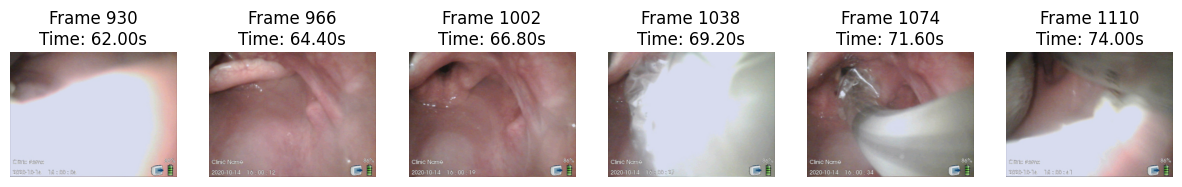

In [46]:
video_path_example = video_df['Video_path'].iloc[2]  # or any valid path
analyze_video_metrics_single_plot(
    video_path_example,
    start_sec=62,
    end_sec=74.2,
    num_frames_to_display=5
)

# Heuristic Rule for Clip Range 

## 1. Heuristic Based on Signal Instability
Core idea: Define a measure of how fast or how often your signals (brightness, contrast, color metrics, etc.) fluctuate, then detect when that measure is persistently high.

Step-by-Step
Extract Per-Frame Metrics
For each frame, compute brightness, contrast, hue, saturation, value, etc. as you’ve been doing.

Compute a “Volatility” or “Instability” Measure

One simple way is to calculate a rolling standard deviation or a rolling sum of absolute differences.
For example, if you have brightness 𝑏_𝑖 at frame 𝑖, you might define: \text{brightness_diff}_i = |b_{i} - b_{i-1}| and similarly for contrast, hue, etc.
Combine them into one measure (for instance, sum or weighted sum):
instability_i =α⋅∣b_i−b_(i−1)∣+β⋅∣c_i−c_(i−1)∣+…

Optionally smooth it with a rolling average or median to reduce noise.
Look for Extended Periods of High Instability

You could apply a threshold on this instability measure, but you also want to ensure it’s sustained.
For example, define a second rolling window (say 2–5 seconds) and mark frames as “high instability” if the average is above a threshold.
Then look for consecutive frames that meet the condition. The start of that consecutive block is your “start time,” and when it drops below the threshold for a while, that’s your “end time.”
Refine/Validate

Test on a few videos, plot the instability measure, and see if the largest sustained region aligns with your procedure of interest.
Adjust window sizes or weighting factors (α,β) if needed.
Batch Processing

Once you trust the approach, run it on all 100 videos.
For each video, record the start and end of the high-instability region.
Optionally, review a random sample to confirm correctness, then clip the videos programmatically.


Below is an example that processes a single video to compute an “instability” measure based on how much brightness and contrast change from one frame to the next. You can later loop over your list of videos to apply this procedure across your dataset.

In this example, we:

Extract per‐frame brightness (mean of grayscale) and contrast (std of grayscale).
Compute the frame-to-frame difference for each metric and sum these differences as a simple instability measure.
Smooth the resulting instability signal with a moving average (to reduce noise).

Plot both the raw and smoothed instability signal over time.

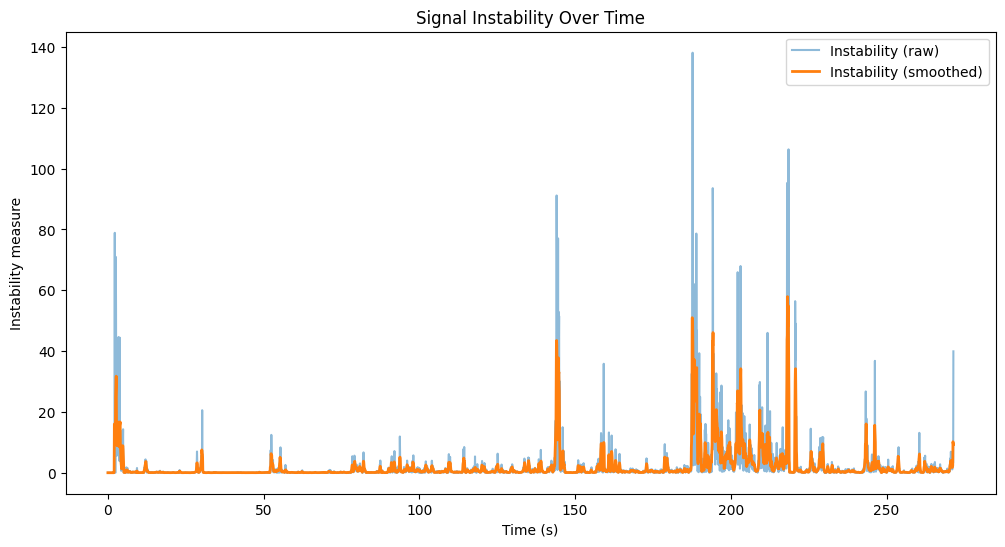

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_metrics_and_instability(video_path, smoothing_window=5):
    """
    Processes a video to extract per-frame brightness and contrast,
    then computes an instability measure as the sum of absolute differences
    in brightness and contrast between consecutive frames.
    
    Parameters:
      video_path (str): path to the video file.
      smoothing_window (int): window size for moving average smoothing.
      
    Returns:
      times (list): timestamp (in seconds) for each frame.
      brightness (list): brightness (mean of grayscale) for each frame.
      contrast (list): contrast (std of grayscale) for each frame.
      instability (np.array): raw instability measure per frame.
      instability_smoothed (np.array): instability measure after smoothing.
    """
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    times = []
    brightness = []
    contrast = []
    instability = []
    frame_index = 0
    prev_brightness = None
    prev_contrast = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Compute timestamp in seconds
        t = frame_index / fps if fps > 0 else frame_index
        times.append(t)
        
        # Compute brightness and contrast from grayscale image
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        br = np.mean(gray)
        co = np.std(gray)
        brightness.append(br)
        contrast.append(co)
        
        # Compute instability measure: sum of absolute differences from previous frame
        if frame_index == 0:
            instability.append(0)
        else:
            diff_br = abs(br - prev_brightness)
            diff_co = abs(co - prev_contrast)
            inst = diff_br + diff_co
            instability.append(inst)
        
        prev_brightness = br
        prev_contrast = co
        frame_index += 1

    cap.release()

    # Convert instability measure to a numpy array and smooth it using a moving average
    instability = np.array(instability)
    window = np.ones(smoothing_window) / smoothing_window
    instability_smoothed = np.convolve(instability, window, mode='same')
    
    return times, brightness, contrast, instability, instability_smoothed

# Usage example for one video:
# Replace video_path_example with a valid video path from your dataframe, e.g.,
video_path_example = video_df['Video_path'].iloc[0]
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(video_path_example, smoothing_window=5)

# Plot the raw and smoothed instability measure over time
plt.figure(figsize=(12, 6))
plt.plot(times, instability, label='Instability (raw)', alpha=0.5)
plt.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Instability measure")
plt.title("Signal Instability Over Time")
plt.legend()
plt.show()


In [55]:
video_df['Video_path'].iloc[0]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201029-170946.avi'

In [54]:
video_df['Video_path'].iloc[1]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201026-094437.avi'

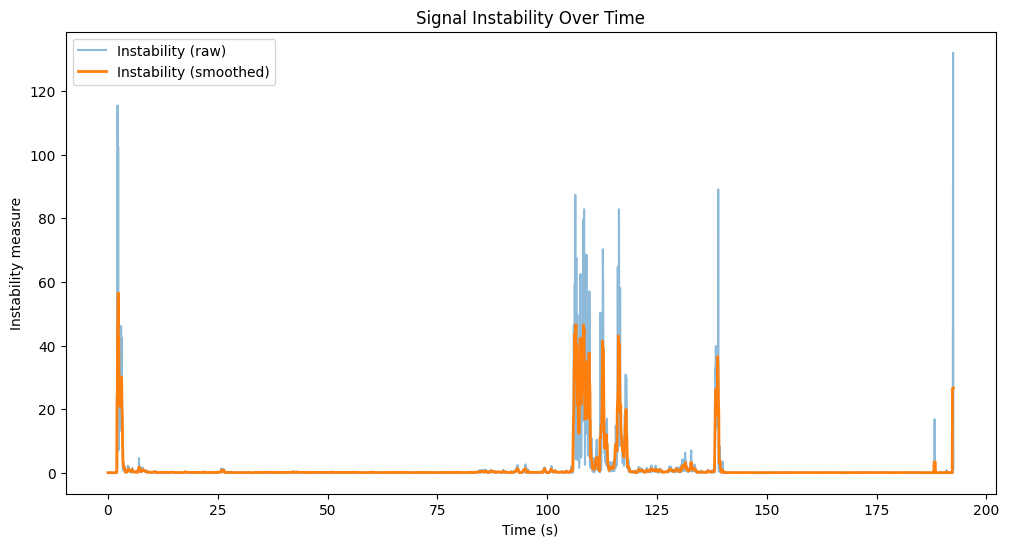

In [48]:
video_path_example = video_df['Video_path'].iloc[1]
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(video_path_example, smoothing_window=5)

# Plot the raw and smoothed instability measure over time
plt.figure(figsize=(12, 6))
plt.plot(times, instability, label='Instability (raw)', alpha=0.5)
plt.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Instability measure")
plt.title("Signal Instability Over Time")
plt.legend()
plt.show()

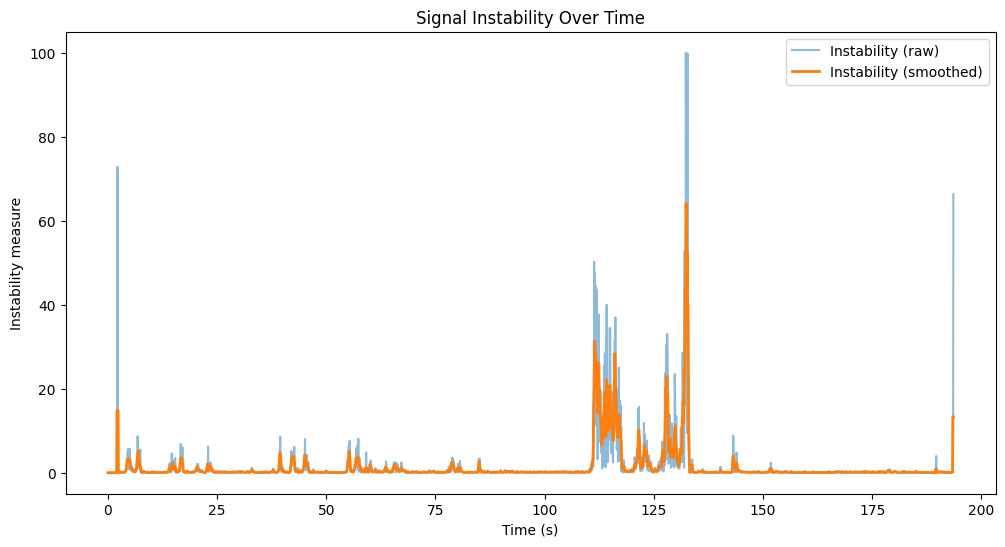

In [49]:
video_path_example = video_df['Video_path'].iloc[50]
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(video_path_example, smoothing_window=5)

# Plot the raw and smoothed instability measure over time
plt.figure(figsize=(12, 6))
plt.plot(times, instability, label='Instability (raw)', alpha=0.5)
plt.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Instability measure")
plt.title("Signal Instability Over Time")
plt.legend()
plt.show()

In [53]:
video_df['Video_path'].iloc[89]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/second 100 videos/20200327-090450.avi'

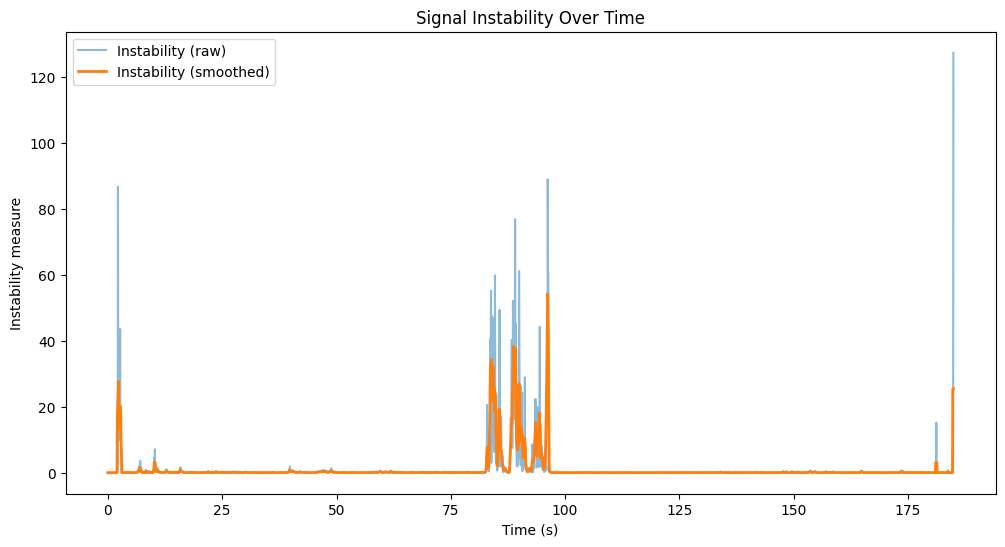

In [50]:
video_path_example = video_df['Video_path'].iloc[89]
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(video_path_example, smoothing_window=5)

# Plot the raw and smoothed instability measure over time
plt.figure(figsize=(12, 6))
plt.plot(times, instability, label='Instability (raw)', alpha=0.5)
plt.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Instability measure")
plt.title("Signal Instability Over Time")
plt.legend()
plt.show()

In [52]:
video_df['Video_path'].iloc[33]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201015-112211.avi'

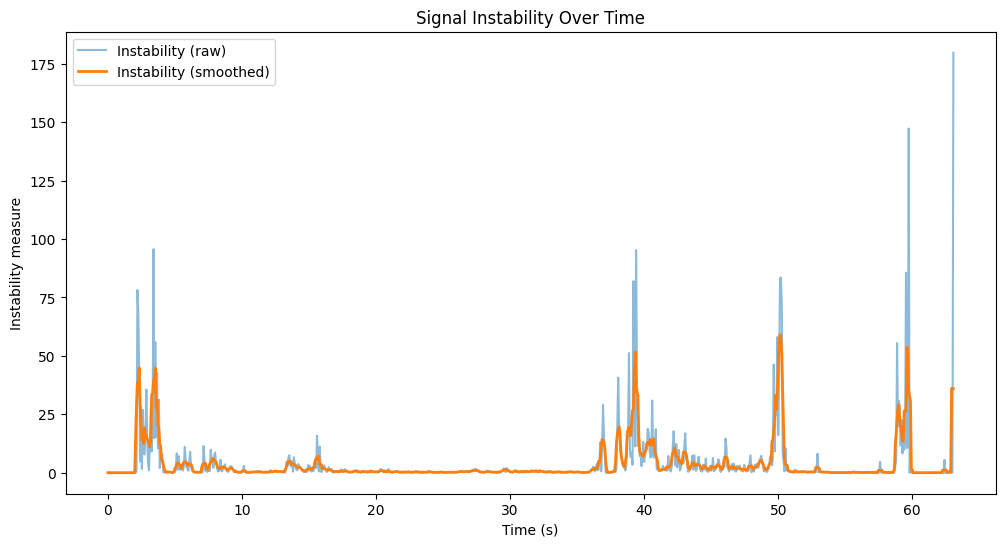

In [51]:
video_path_example = video_df['Video_path'].iloc[33]
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(video_path_example, smoothing_window=5)

# Plot the raw and smoothed instability measure over time
plt.figure(figsize=(12, 6))
plt.plot(times, instability, label='Instability (raw)', alpha=0.5)
plt.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Instability measure")
plt.title("Signal Instability Over Time")
plt.legend()
plt.show()

## attempt to extract high-instability segments of a video

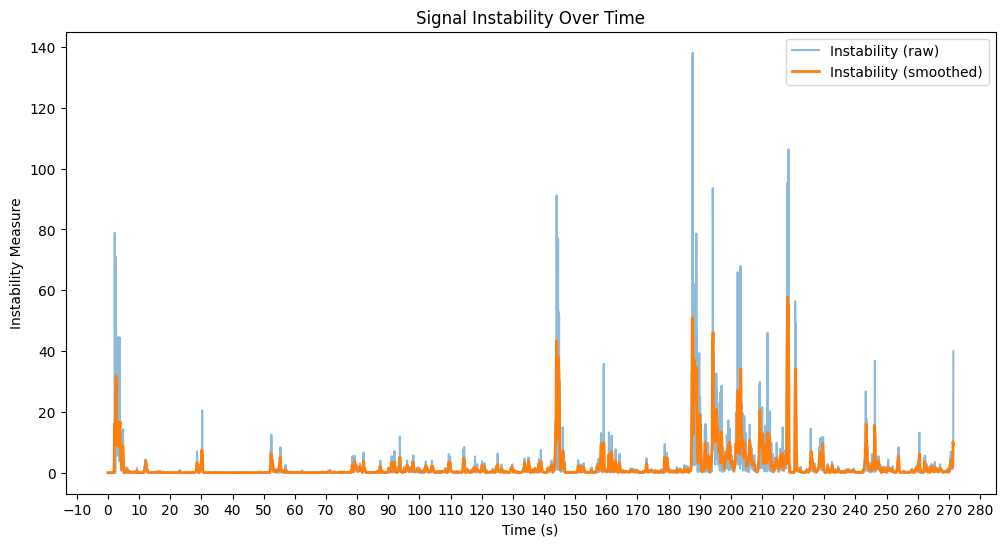

Threshold: 1.4209422283037867
Detected high-instability segments (merged):
Start: 201.20s, End: 207.67s, Duration: 6.47s


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Heuristic for Detecting a Period of Higher Instability

def extract_metrics_and_instability(video_path, smoothing_window=5):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    times = []
    brightness = []
    contrast = []
    instability = []
    frame_index = 0
    prev_brightness = None
    prev_contrast = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        t = frame_index / fps if fps > 0 else frame_index
        times.append(t)
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        br = np.mean(gray)
        co = np.std(gray)
        brightness.append(br)
        contrast.append(co)
        
        if frame_index == 0:
            # no previous frame to compare
            instability.append(0)
        else:
            diff_br = abs(br - prev_brightness)
            diff_co = abs(co - prev_contrast)
            inst = diff_br + diff_co
            instability.append(inst)
        
        prev_brightness = br
        prev_contrast = co
        frame_index += 1

    cap.release()

    # Convert to numpy arrays
    times = np.array(times)
    instability = np.array(instability)

    # Smooth instability with a simple moving average
    window = np.ones(smoothing_window) / smoothing_window
    instability_smoothed = np.convolve(instability, window, mode='same')

    return times, brightness, contrast, instability, instability_smoothed

def find_high_instability_segments(times, instability_smoothed, threshold, min_duration):
    """
    Finds periods where instability_smoothed > threshold for at least min_duration seconds.
    Returns a list of (start_time, end_time) tuples.
    """
    above = (instability_smoothed > threshold)
    segments = []
    start_idx = None

    for i in range(len(above)):
        if above[i] and start_idx is None:
            start_idx = i  # begin a new segment
        if not above[i] and start_idx is not None:
            # Segment ended at i-1
            end_idx = i - 1
            duration = times[end_idx] - times[start_idx]
            if duration >= min_duration:
                segments.append((times[start_idx], times[end_idx]))
            start_idx = None

    # Handle case if the signal ends while above threshold
    if start_idx is not None:
        end_idx = len(above) - 1
        duration = times[end_idx] - times[start_idx]
        if duration >= min_duration:
            segments.append((times[start_idx], times[end_idx]))

    return segments

def merge_segments(segments, allowed_gap):
    """
    Given a list of (start, end) segments, merge segments that are separated by a gap
    less than allowed_gap (in seconds).
    """
    if not segments:
        return []
    merged = [segments[0]]
    for seg in segments[1:]:
        prev_seg = merged[-1]
        # If the gap between the previous segment's end and the current segment's start is small,
        # merge them.
        if seg[0] - prev_seg[1] <= allowed_gap:
            merged[-1] = (prev_seg[0], seg[1])
        else:
            merged.append(seg)
    return merged

# Example usage:
import numpy as np

# Example usage:
video_path_example = video_df['Video_path'].iloc[0]  # pick a video
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)

# Increase x-axis label frequency
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()
plt.show()

# Assume instability_smoothed and times are computed as before
# For example, set threshold_value as:
# threshold_value = np.mean(instability_smoothed) + 3 * np.std(instability_smoothed)
# e.g., 75th percentile
threshold_value = np.percentile(instability_smoothed, 75)
# Define how long the signal must remain above threshold to count (in seconds)
min_duration = 5 #10 #5
allowed_gap = 15 #5  # seconds

print("Threshold:", threshold_value)

# First, get the initial segments
raw_segments = find_high_instability_segments(times, instability_smoothed, threshold_value, min_duration)

# Now merge segments if the gap between them is small (e.g., less than 3 seconds)
segments = merge_segments(raw_segments, allowed_gap)

print("Detected high-instability segments (merged):")
for seg in segments:
    print(f"Start: {seg[0]:.2f}s, End: {seg[1]:.2f}s, Duration: {seg[1] - seg[0]:.2f}s")

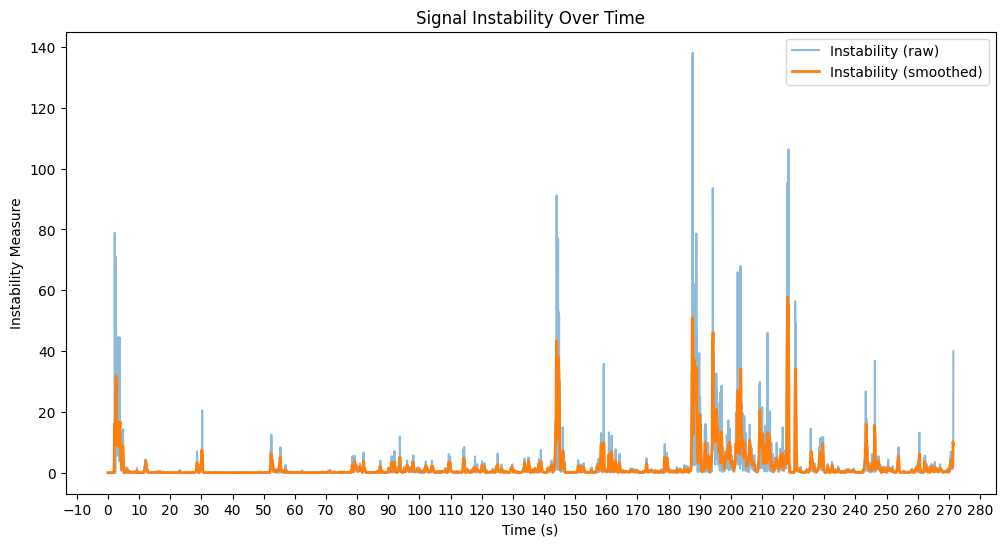

Highest average instability window: 187.47 - 202.47 sec, avg=10.68


In [ ]:


def find_max_average_window(times, instability_smoothed, window_length=30.0):
    """
    Finds the continuous time window of length `window_length` (in seconds)
    that has the highest average instability_smoothed.
    Returns (best_start, best_end, best_average).
    """
    best_start = 0
    best_end = 0
    best_avg = -1

    # We'll iterate through each frame as a potential window start
    n = len(times)
    for i in range(n):
        start_time = times[i]
        end_time = start_time + window_length
        # Find all frames up to end_time
        j = i
        while j < n and times[j] <= end_time:
            j += 1
        # Now we have a slice from i to j-1
        if j - 1 > i:
            avg_inst = np.mean(instability_smoothed[i:j])
            if avg_inst > best_avg:
                best_avg = avg_inst
                best_start = start_time
                # times[j-1] might be slightly less than end_time
                best_end = times[j-1] if j - 1 < n else times[-1]

    return best_start, best_end, best_avg



# Example usage:
video_path_example = video_df['Video_path'].iloc[0]  # pick a video
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)

# Increase x-axis label frequency
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()
plt.show()


# Usage example:
best_start, best_end, best_avg = find_max_average_window(times, instability_smoothed, 15.0)
print(f"Highest average instability window: {best_start:.2f} - {best_end:.2f} sec, avg={best_avg:.2f}")


# change point detection

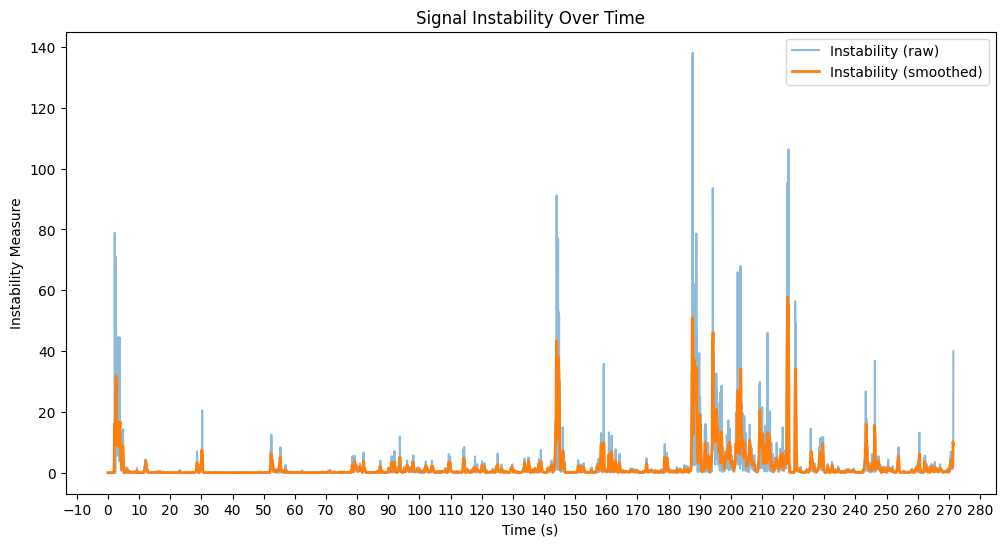

Detected change points (frame indices): [30, 35, 40, 45, 50, 60, 65, 70, 75, 175, 190, 425, 450, 455, 460, 785, 790, 795, 825, 835, 1175, 1200, 1230, 1235, 1360, 1385, 1405, 1410, 1465, 1475, 1640, 1650, 1710, 1720, 1870, 1880, 2005, 2010, 2025, 2030, 2075, 2090, 2115, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185, 2190, 2195, 2200, 2260, 2295, 2355, 2370, 2375, 2380, 2385, 2390, 2395, 2410, 2415, 2425, 2430, 2470, 2680, 2685, 2690, 2700, 2810, 2815, 2820, 2835, 2840, 2845, 2855, 2860, 2865, 2875, 2880, 2895, 2905, 2910, 2915, 2920, 2930, 2935, 2940, 2960, 2975, 2985, 3000, 3010, 3020, 3025, 3030, 3035, 3040, 3045, 3050, 3055, 3060, 3075, 3085, 3090, 3095, 3100, 3115, 3135, 3145, 3155, 3165, 3170, 3175, 3180, 3190, 3195, 3215, 3225, 3235, 3265, 3270, 3280, 3285, 3305, 3310, 3315, 3320, 3380, 3385, 3395, 3425, 3435, 3440, 3445, 3450, 3645, 3650, 3655, 3660, 3690, 3695, 3700, 3715, 3805, 3810, 3890, 3905, 3910, 3915, 3930, 3945, 4055, 4070, 4073]


In [102]:
import ruptures as rpt


# Example usage:
video_path_example = video_df['Video_path'].iloc[0]  # pick a video
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)

# Increase x-axis label frequency
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()
plt.show()


# Example with the instability_smoothed signal:
algo = rpt.Pelt(model="l2").fit(instability_smoothed)
result = algo.predict(pen=10)  # Tuning the penalty parameter is crucial
print("Detected change points (frame indices):", result)
# Map these frame indices to times and review if the large change corresponds to your region.


## change points and instability function variation 2
### attempting to see any signal trends in the intubation dataset in order to define a automatic video trimming rule set

Detected change points (frame indices): [30, 35, 40, 45, 50, 60, 65, 70, 75, 175, 190, 425, 450, 455, 460, 785, 790, 795, 825, 835, 1175, 1200, 1230, 1235, 1360, 1385, 1405, 1410, 1465, 1475, 1640, 1650, 1710, 1720, 1870, 1880, 2005, 2010, 2025, 2030, 2075, 2090, 2115, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185, 2190, 2195, 2200, 2260, 2295, 2355, 2370, 2375, 2380, 2385, 2390, 2395, 2410, 2415, 2425, 2430, 2470, 2680, 2685, 2690, 2700, 2810, 2815, 2820, 2835, 2840, 2845, 2855, 2860, 2865, 2875, 2880, 2895, 2905, 2910, 2915, 2920, 2930, 2935, 2940, 2960, 2975, 2985, 3000, 3010, 3020, 3025, 3030, 3035, 3040, 3045, 3050, 3055, 3060, 3075, 3085, 3090, 3095, 3100, 3115, 3135, 3145, 3155, 3165, 3170, 3175, 3180, 3190, 3195, 3215, 3225, 3235, 3265, 3270, 3280, 3285, 3305, 3310, 3315, 3320, 3380, 3385, 3395, 3425, 3435, 3440, 3445, 3450, 3645, 3650, 3655, 3660, 3690, 3695, 3700, 3715, 3805, 3810, 3890, 3905, 3910, 3915, 3930, 3945, 4055, 4070, 4073]
Detected change points (times in seconds

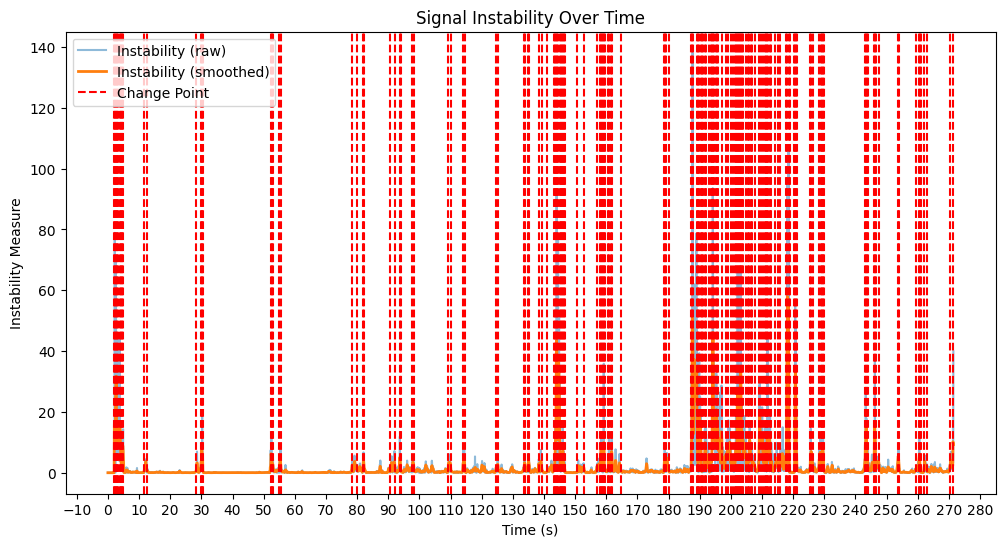

In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ruptures as rpt

def extract_metrics_and_instability(video_path, smoothing_window=5):
    """
    Extract per-frame brightness, contrast, and compute an instability measure,
    then smooth it using a simple moving average.
    
    Returns:
      times: array of timestamps (in seconds) per frame.
      brightness: list of brightness values.
      contrast: list of contrast values.
      instability: raw instability measure (per frame differences).
      instability_smoothed: instability signal after smoothing.
    """
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    times = []
    brightness = []
    contrast = []
    instability = []
    frame_index = 0
    prev_brightness = None
    prev_contrast = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        t = frame_index / fps if fps > 0 else frame_index
        times.append(t)
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        br = np.mean(gray)
        co = np.std(gray)
        brightness.append(br)
        contrast.append(co)
        
        if frame_index == 0:
            instability.append(0)
        else:
            diff_br = abs(br - prev_brightness)
            diff_co = abs(co - prev_contrast)
            inst = diff_br + diff_co
            instability.append(inst)
        
        prev_brightness = br
        prev_contrast = co
        frame_index += 1

    cap.release()
    
    times = np.array(times)
    instability = np.array(instability)
    
    # Smooth instability with a simple moving average
    window = np.ones(smoothing_window) / smoothing_window
    instability_smoothed = np.convolve(instability, window, mode='same')
    
    return times, brightness, contrast, instability, instability_smoothed

# Example usage:
video_path_example = video_df['Video_path'].iloc[0]  # pick a video from your dataframe
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()

# Use ruptures to detect change points on the smoothed instability signal.
algo = rpt.Pelt(model="l2").fit(instability_smoothed)
result = algo.predict(pen=10)  # Tuning the penalty parameter is crucial
print("Detected change points (frame indices):", result)

# Convert the change point frame indices to times (in seconds)
change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (times in seconds):", change_point_times)

# Plot vertical lines at the detected change points
for cp in change_point_times:
    ax.axvline(cp, color='red', linestyle='--', label='Change Point')

# To avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

plt.show()


Detected change points (frame indices): [30, 35, 40, 45, 50, 60, 65, 70, 75, 175, 190, 425, 450, 455, 460, 785, 795, 825, 835, 1175, 1240, 1350, 1405, 1410, 1640, 1650, 1710, 1720, 2000, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2190, 2195, 2355, 2375, 2380, 2385, 2390, 2410, 2415, 2425, 2430, 2470, 2680, 2700, 2810, 2815, 2820, 2835, 2840, 2845, 2855, 2860, 2875, 2880, 2895, 2905, 2910, 2915, 2920, 2930, 2935, 2940, 2960, 2975, 3000, 3020, 3025, 3030, 3035, 3040, 3045, 3050, 3055, 3060, 3070, 3090, 3095, 3100, 3115, 3135, 3145, 3155, 3165, 3170, 3175, 3180, 3190, 3235, 3265, 3270, 3280, 3285, 3305, 3310, 3315, 3320, 3385, 3395, 3425, 3435, 3440, 3445, 3450, 3645, 3650, 3655, 3660, 3690, 3695, 3700, 3715, 3805, 3810, 3905, 3910, 4055, 4070, 4073]
Detected change points (times in seconds): [2.0, 2.3333333333333335, 2.6666666666666665, 3.0, 3.3333333333333335, 4.0, 4.333333333333333, 4.666666666666667, 5.0, 11.666666666666666, 12.666666666666666, 28.333333333333332, 30.0, 30.333333333333

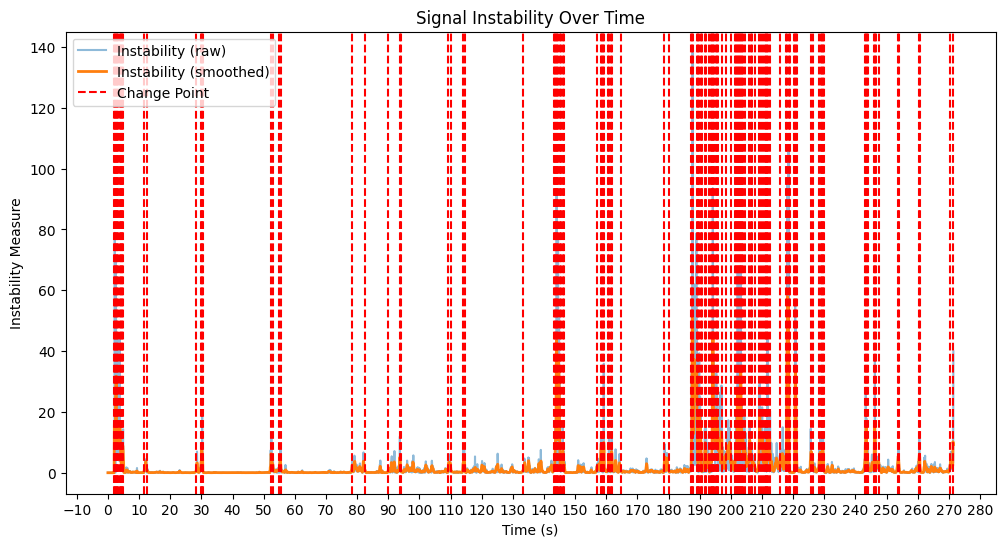

In [110]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[0]  # pick a video from your dataframe
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()

# Use ruptures to detect change points on the smoothed instability signal.
algo = rpt.Pelt(model="l2").fit(instability_smoothed)
result = algo.predict(pen=20)  # Tuning the penalty parameter is crucial
print("Detected change points (frame indices):", result)

# Convert the change point frame indices to times (in seconds)
change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (times in seconds):", change_point_times)

# Plot vertical lines at the detected change points
for cp in change_point_times:
    ax.axvline(cp, color='red', linestyle='--', label='Change Point')

# To avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

plt.show()

In [105]:
video_df['Video_path'].iloc[1]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201026-094437.avi'

Detected change points (frame indices): [30, 35, 40, 50, 55, 130, 1260, 1585, 1590, 1595, 1600, 1605, 1610, 1615, 1620, 1630, 1645, 1650, 1655, 1665, 1675, 1680, 1685, 1690, 1695, 1705, 1710, 1730, 1735, 1740, 1750, 1755, 1765, 1770, 1775, 1960, 2005, 2070, 2075, 2080, 2085, 2090, 2095, 2820, 2825, 2880, 2885, 2888]
Detected change points (times in seconds): [2.0, 2.3333333333333335, 2.6666666666666665, 3.3333333333333335, 3.6666666666666665, 8.666666666666666, 84.0, 105.66666666666667, 106.0, 106.33333333333333, 106.66666666666667, 107.0, 107.33333333333333, 107.66666666666667, 108.0, 108.66666666666667, 109.66666666666667, 110.0, 110.33333333333333, 111.0, 111.66666666666667, 112.0, 112.33333333333333, 112.66666666666667, 113.0, 113.66666666666667, 114.0, 115.33333333333333, 115.66666666666667, 116.0, 116.66666666666667, 117.0, 117.66666666666667, 118.0, 118.33333333333333, 130.66666666666666, 133.66666666666666, 138.0, 138.33333333333334, 138.66666666666666, 139.0, 139.3333333333333

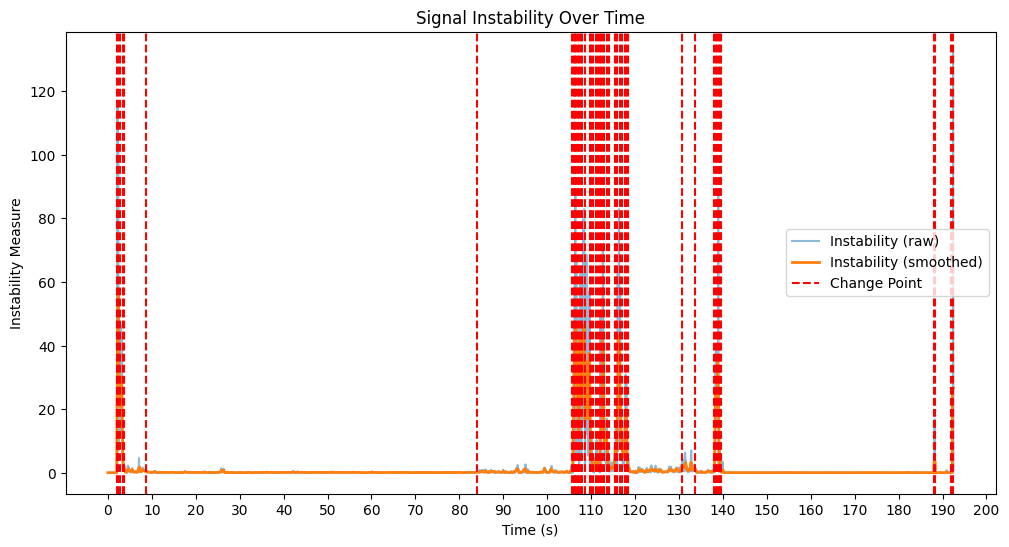

In [104]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[1]  # pick a video from your dataframe
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()

# Use ruptures to detect change points on the smoothed instability signal.
algo = rpt.Pelt(model="l2").fit(instability_smoothed)
result = algo.predict(pen=10)  # Tuning the penalty parameter is crucial
print("Detected change points (frame indices):", result)

# Convert the change point frame indices to times (in seconds)
change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (times in seconds):", change_point_times)

# Plot vertical lines at the detected change points
for cp in change_point_times:
    ax.axvline(cp, color='red', linestyle='--', label='Change Point')

# To avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

plt.show()


In [107]:
video_df['Video_path'].iloc[2]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201011-041330.avi'

Detected change points (frame indices): [30, 35, 40, 45, 60, 65, 75, 80, 85, 585, 590, 595, 600, 605, 850, 880, 885, 890, 895, 900, 910, 915, 920, 925, 930, 940, 950, 965, 970, 1005, 1010, 1015, 1020, 1025, 1035, 1040, 1045, 1050, 1060, 1065, 1070, 1075, 1105, 1110, 1115, 1120, 1125, 1140, 1145, 1150, 1155, 1180, 1185, 1190, 1192]
Detected change points (times in seconds): [2.0, 2.3333333333333335, 2.6666666666666665, 3.0, 4.0, 4.333333333333333, 5.0, 5.333333333333333, 5.666666666666667, 39.0, 39.333333333333336, 39.666666666666664, 40.0, 40.333333333333336, 56.666666666666664, 58.666666666666664, 59.0, 59.333333333333336, 59.666666666666664, 60.0, 60.666666666666664, 61.0, 61.333333333333336, 61.666666666666664, 62.0, 62.666666666666664, 63.333333333333336, 64.33333333333333, 64.66666666666667, 67.0, 67.33333333333333, 67.66666666666667, 68.0, 68.33333333333333, 69.0, 69.33333333333333, 69.66666666666667, 70.0, 70.66666666666667, 71.0, 71.33333333333333, 71.66666666666667, 73.6666666

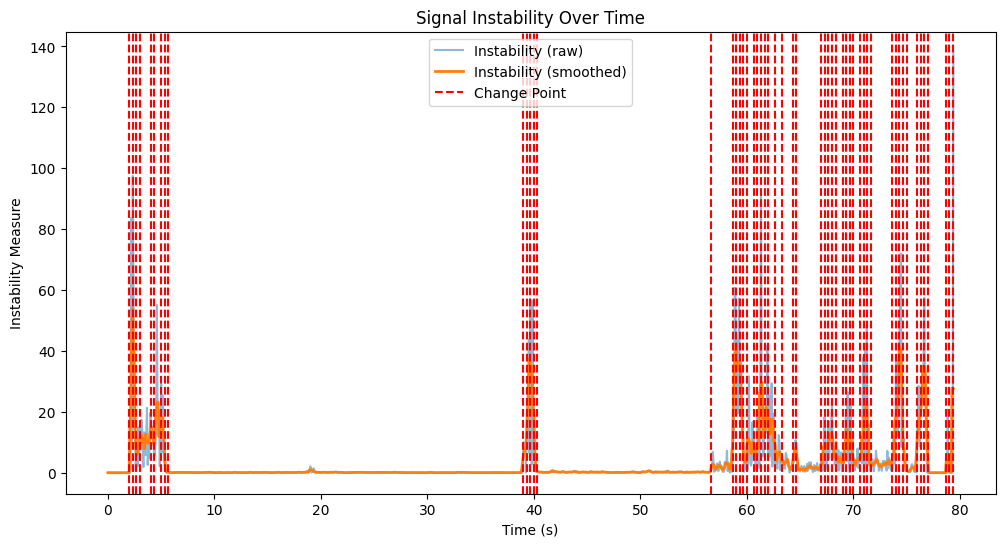

In [106]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[2]  # pick a video from your dataframe
times, brightness, contrast, instability, instability_smoothed = extract_metrics_and_instability(
    video_path_example, smoothing_window=5
)

# Plot the raw and smoothed instability signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability, label='Instability (raw)', alpha=0.5)
ax.plot(times, instability_smoothed, label='Instability (smoothed)', linewidth=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Signal Instability Over Time")
ax.legend()

# Use ruptures to detect change points on the smoothed instability signal.
algo = rpt.Pelt(model="l2").fit(instability_smoothed)
result = algo.predict(pen=10)  # Tuning the penalty parameter is crucial
print("Detected change points (frame indices):", result)

# Convert the change point frame indices to times (in seconds)
change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (times in seconds):", change_point_times)

# Plot vertical lines at the detected change points
for cp in change_point_times:
    ax.axvline(cp, color='red', linestyle='--', label='Change Point')

# To avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

plt.show()


## consider change detection + color to identify any dataset trends useful for auto trim tool

Detected change points (frame indices): [30, 60, 1590, 2155, 2180, 2810, 2940, 3105, 3135, 3195, 3235, 3280, 3645, 3715, 3905, 4073]
Detected change points (seconds): [2.0, 4.0, 106.0, 143.66666666666666, 145.33333333333334, 187.33333333333334, 196.0, 207.0, 209.0, 213.0, 215.66666666666666, 218.66666666666666, 243.0, 247.66666666666666, 260.3333333333333]


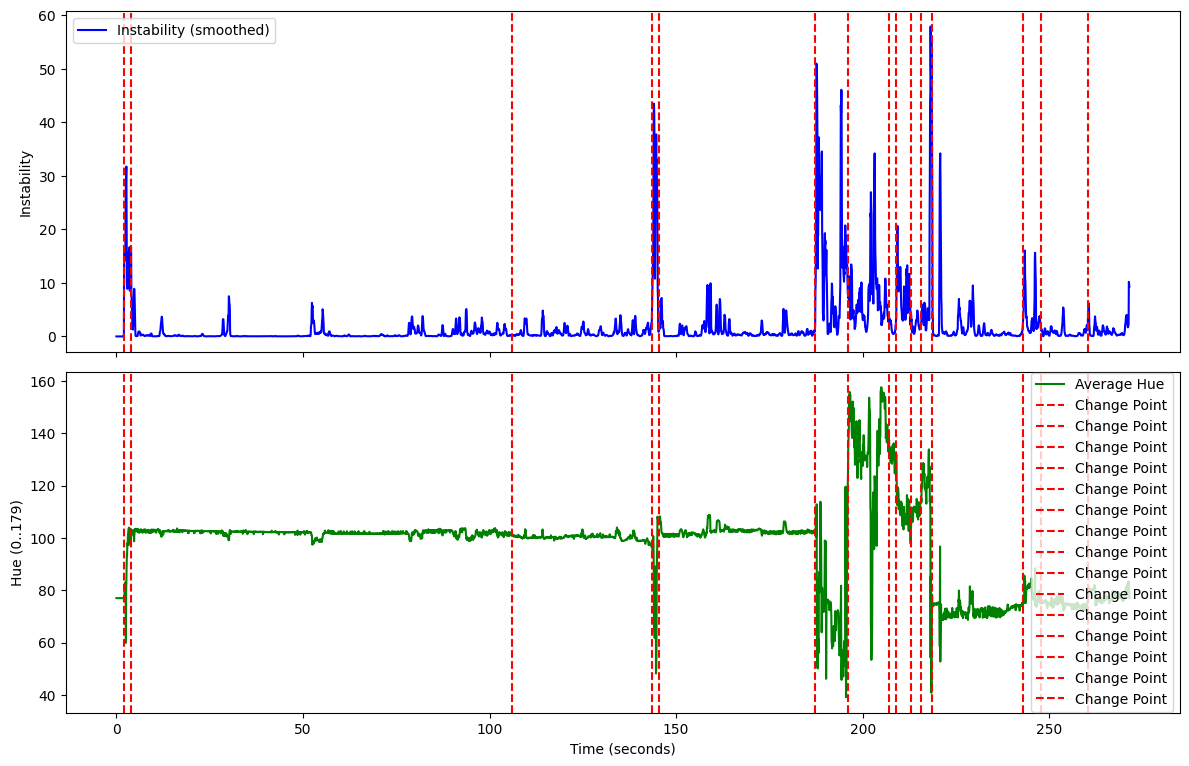

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ruptures as rpt

def extract_instability_and_color(video_path, smoothing_window=5):
    """
    Extract per-frame brightness, contrast, and average hue.
    Then compute:
      - An instability measure (difference in brightness+contrast between frames)
      - A simple average hue measure per frame
    Returns:
      times: array of timestamps (in seconds) per frame
      instability_smoothed: 1D array of smoothed instability
      avg_hue: 1D array of average hue per frame
    """
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    times = []
    brightness = []
    contrast = []
    hue_values = []
    instability = []

    frame_index = 0
    prev_brightness = None
    prev_contrast = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        t = frame_index / fps if fps > 0 else frame_index
        times.append(t)

        # Convert to grayscale for brightness/contrast
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        br = np.mean(gray)
        co = np.std(gray)

        brightness.append(br)
        contrast.append(co)

        # Compute hue (average)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        avg_h = np.mean(hsv[:, :, 0])  # hue channel is 0 in [0..179]
        hue_values.append(avg_h)

        # Instability measure = sum of absolute differences from previous frame
        if frame_index == 0:
            instability.append(0)
        else:
            diff_br = abs(br - prev_brightness)
            diff_co = abs(co - prev_contrast)
            inst = diff_br + diff_co
            instability.append(inst)

        prev_brightness = br
        prev_contrast = co
        frame_index += 1

    cap.release()

    times = np.array(times)
    instability = np.array(instability)
    hue_values = np.array(hue_values)

    # Smooth the instability measure
    window = np.ones(smoothing_window) / smoothing_window
    instability_smoothed = np.convolve(instability, window, mode='same')

    return times, instability_smoothed, hue_values


# Example usage:
video_path_example = video_df['Video_path'].iloc[0]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()


Detected change points (frame indices): [30, 50, 125, 1590, 1645, 1740, 1775, 2075, 2085, 2888]
Detected change points (seconds): [2.0, 3.3333333333333335, 8.333333333333334, 106.0, 109.66666666666667, 116.0, 118.33333333333333, 138.33333333333334, 139.0]


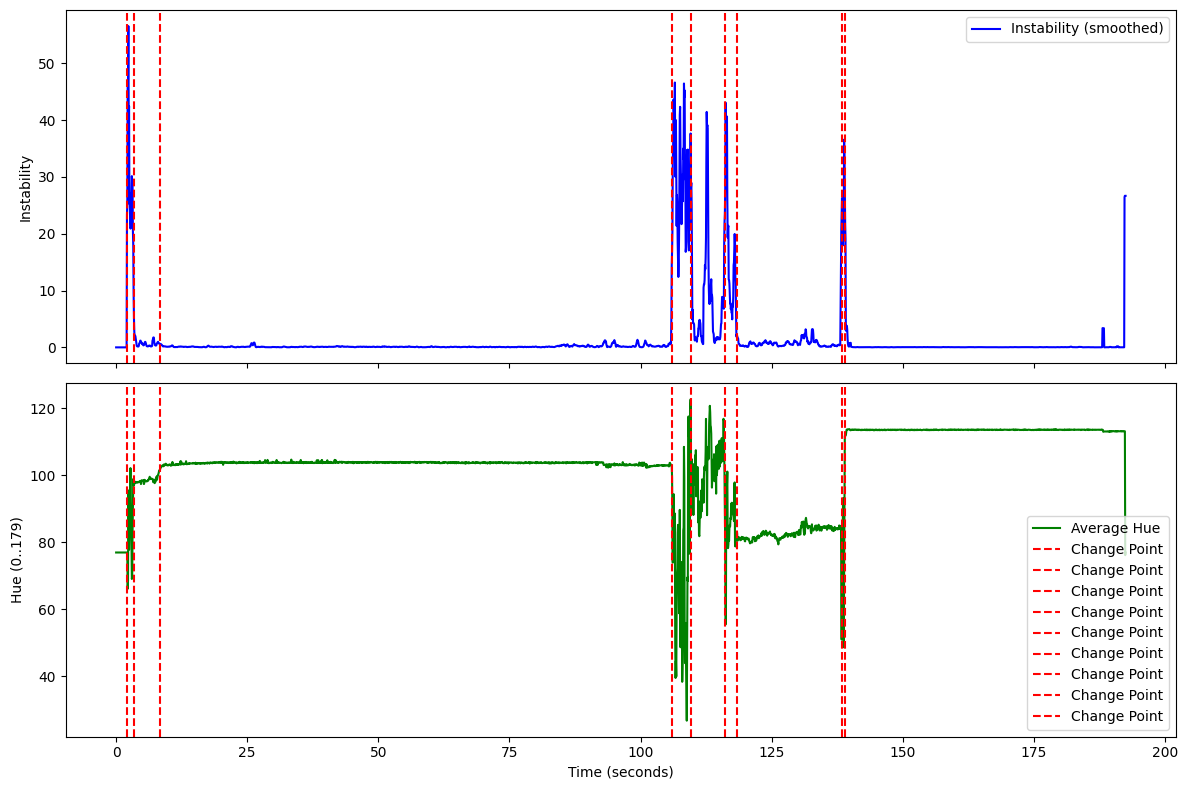

In [112]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[1]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

Detected change points (frame indices): [30, 80, 590, 880, 960, 1010, 1070, 1150, 1192]
Detected change points (seconds): [2.0, 5.333333333333333, 39.333333333333336, 58.666666666666664, 64.0, 67.33333333333333, 71.33333333333333, 76.66666666666667]


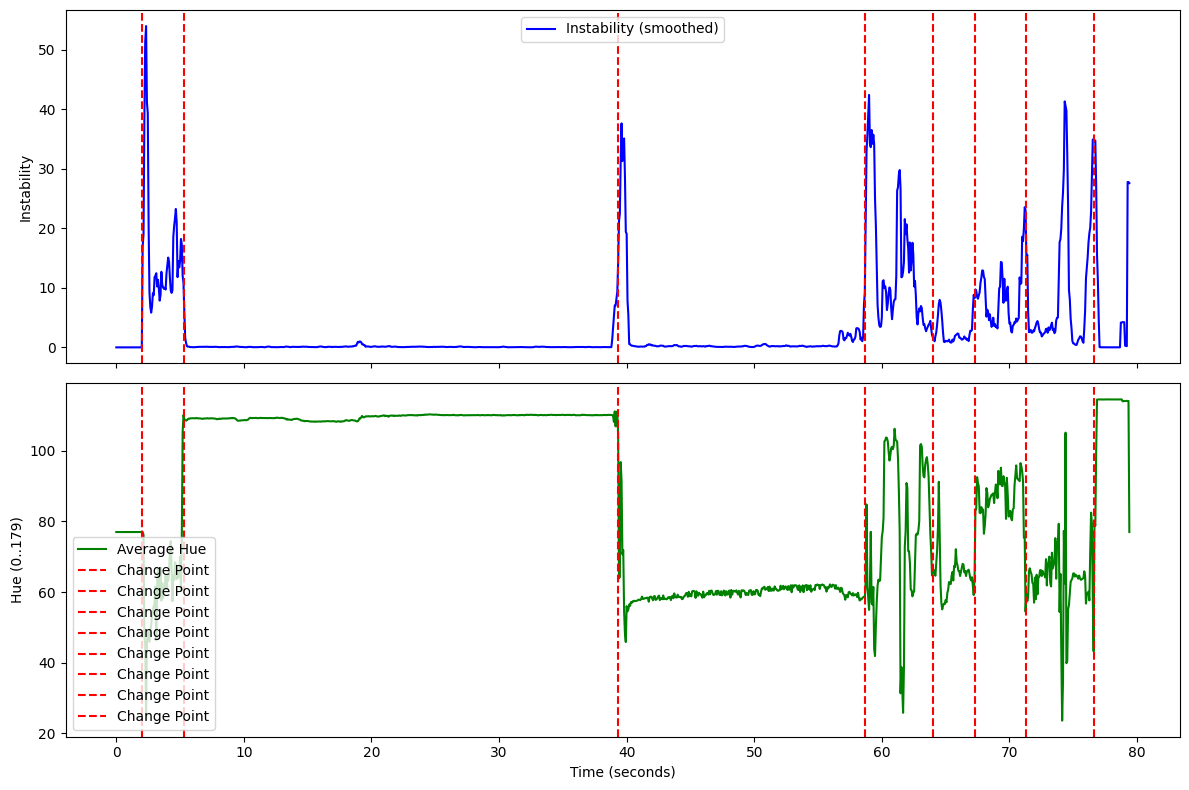

In [113]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[2]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

Detected change points (frame indices): [1255, 1285, 1320, 1350, 1370, 1445, 2775]
Detected change points (seconds): [83.66666666666667, 85.66666666666667, 88.0, 90.0, 91.33333333333333, 96.33333333333333]


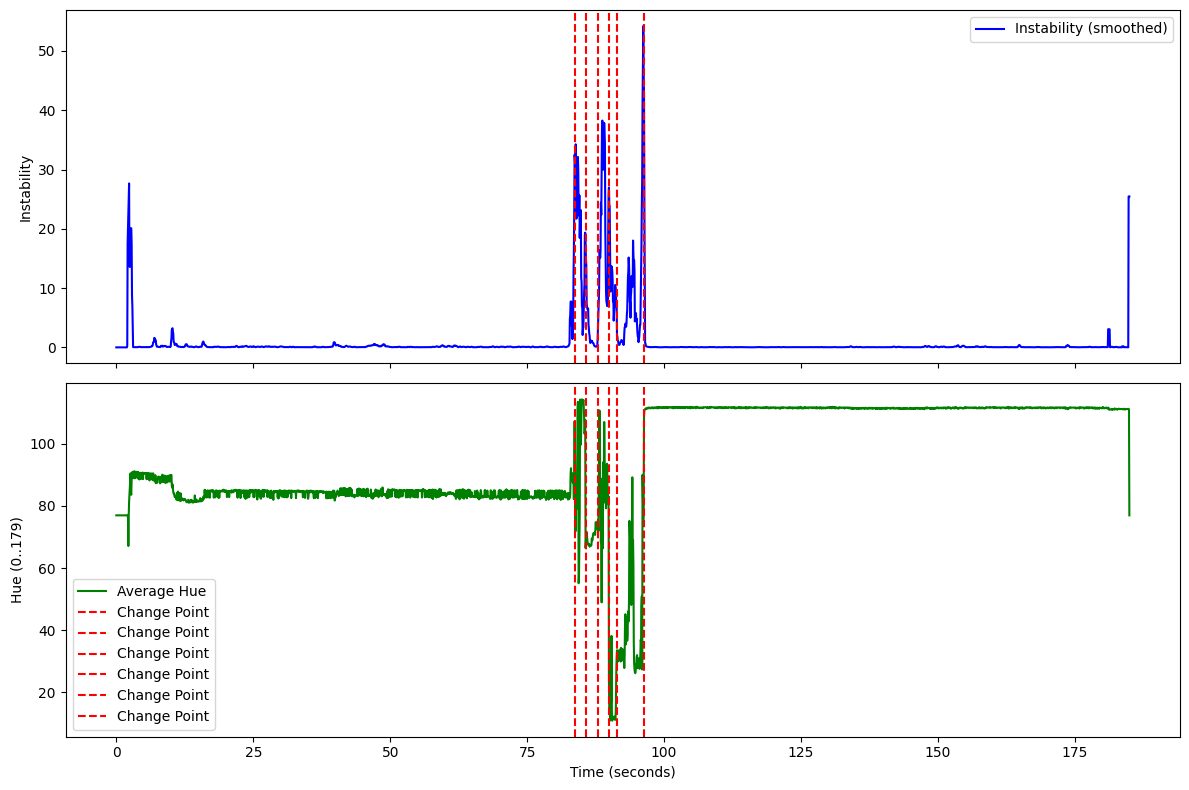

In [114]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[89]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

Detected change points (frame indices): [30, 60, 555, 600, 755, 880, 895, 947]
Detected change points (seconds): [2.0, 4.0, 37.0, 40.0, 50.333333333333336, 58.666666666666664, 59.666666666666664]


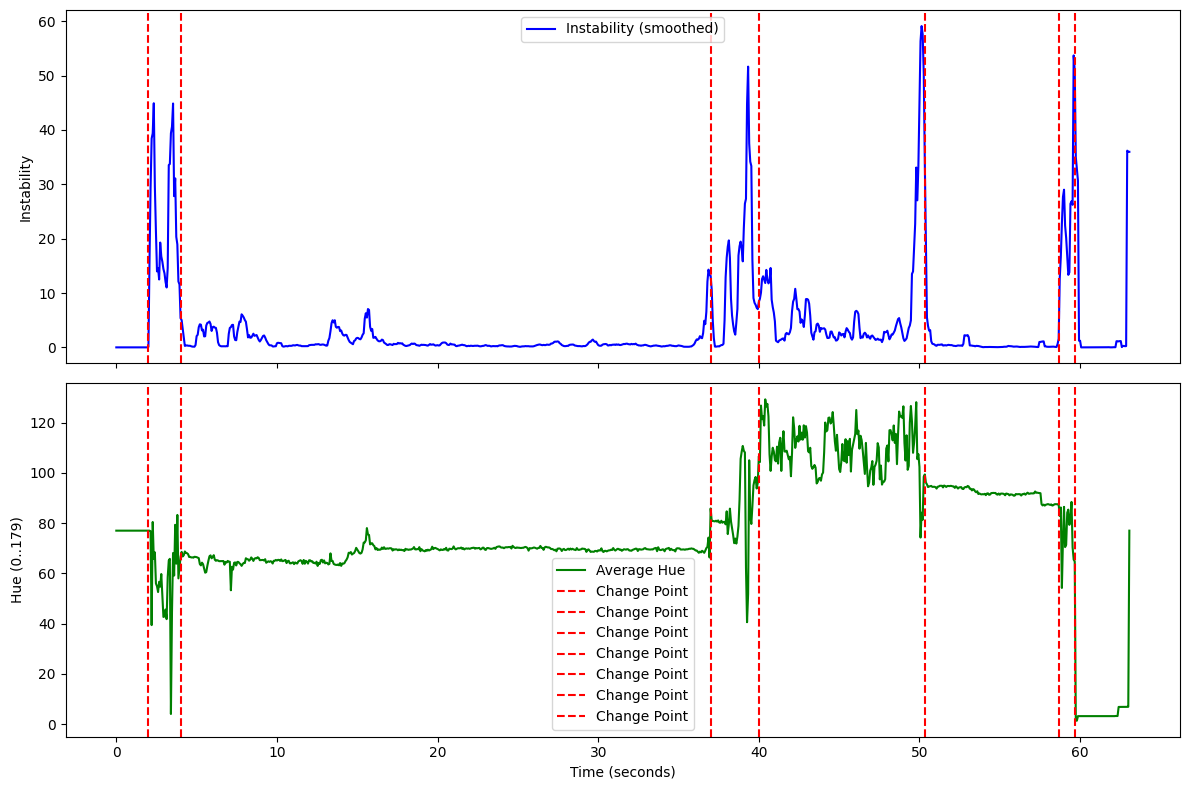

In [115]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[33]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

In [117]:
video_df['Video_path'].iloc[52]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201026-224636.avi'

Detected change points (frame indices): [65, 175, 330, 381]
Detected change points (seconds): [4.333333333333333, 11.666666666666666, 22.0]


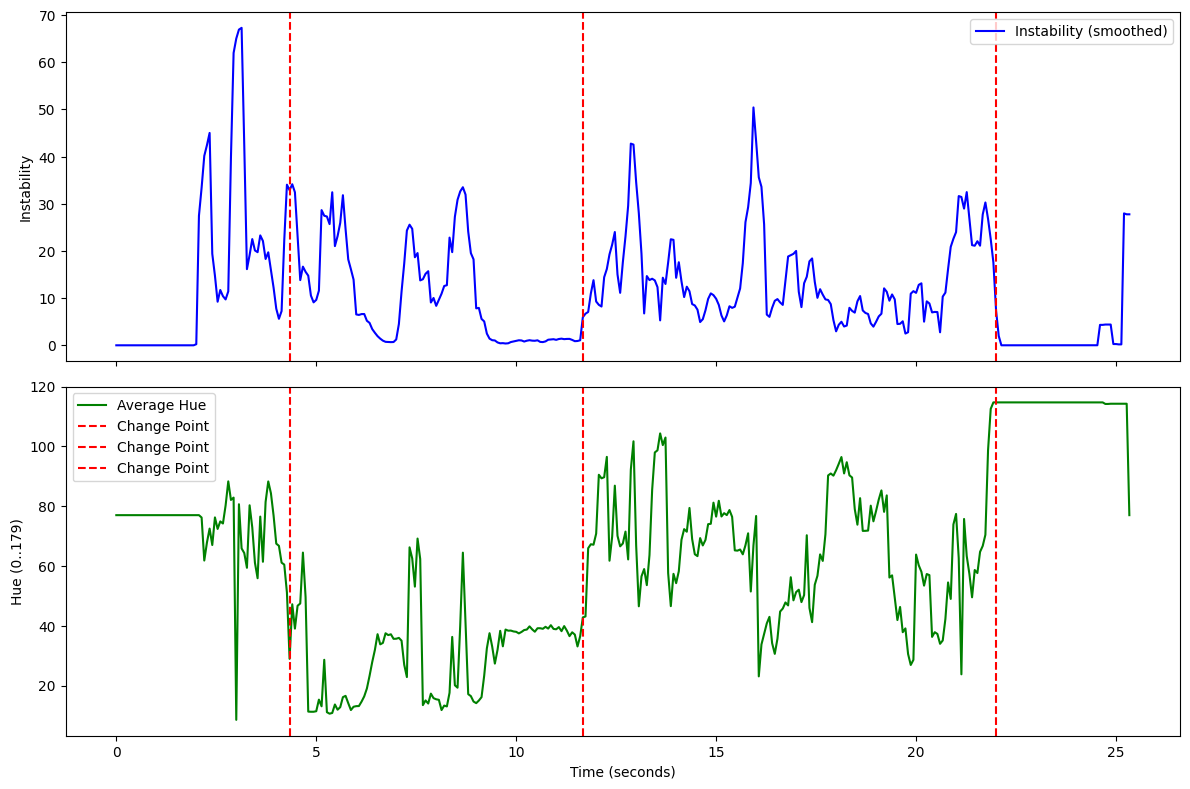

In [116]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[52]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

challenging case - consider whether to filter for short videos differently than the usual long
videos with residual frames. b/c nearly the whole thing is relavent video. Some peaks flagged, while others are not. Penalty function should be adjusted.

Detected change points (frame indices): [55, 2395, 2435, 2475, 2710, 2755, 2875, 2910, 3020, 3065, 3080, 3150, 3285, 3320, 3425, 3515, 3610, 3645, 5956]
Detected change points (seconds): [3.6666666666666665, 159.66666666666666, 162.33333333333334, 165.0, 180.66666666666666, 183.66666666666666, 191.66666666666666, 194.0, 201.33333333333334, 204.33333333333334, 205.33333333333334, 210.0, 219.0, 221.33333333333334, 228.33333333333334, 234.33333333333334, 240.66666666666666, 243.0]


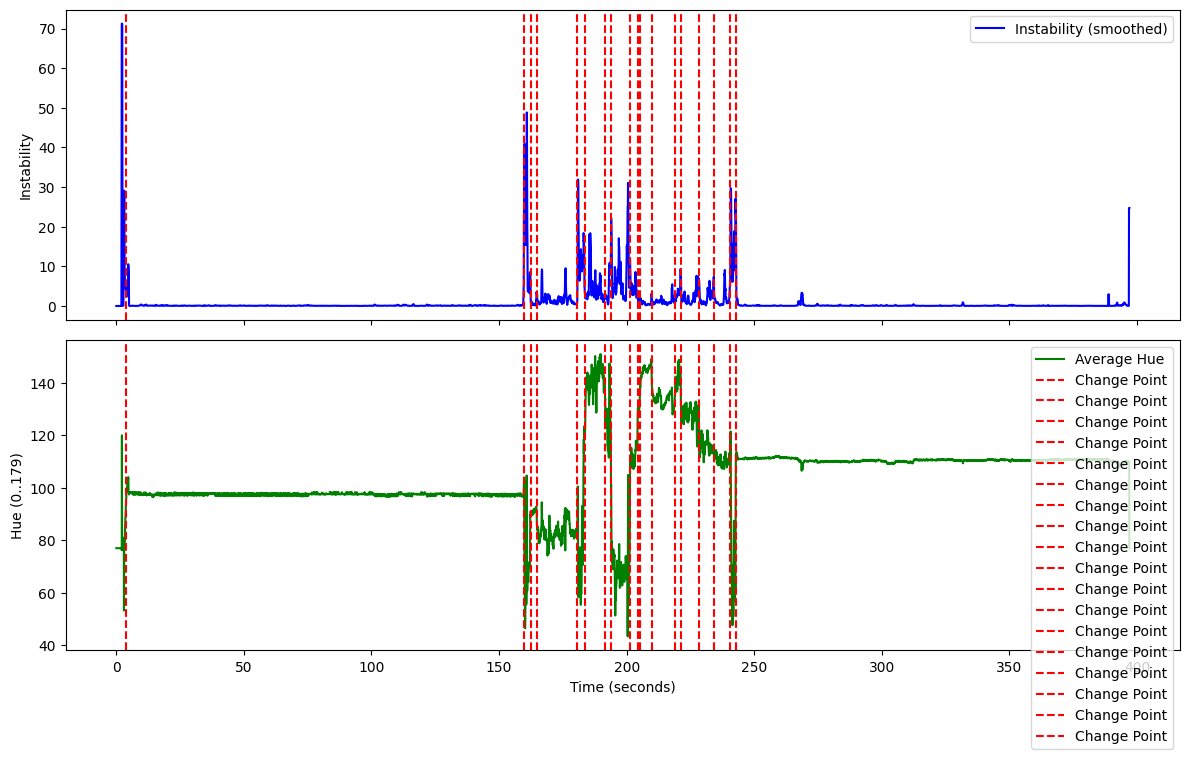

In [118]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[78]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

In [120]:
video_df['Video_path'].iloc[24]

'/data/mskscratch/users/ghoyer/Precision_Air/Data_ VL Videos for review (100)/20201021-121911.avi'

Detected change points (frame indices): [805, 1590, 1640, 1760, 1775, 2501]
Detected change points (seconds): [53.666666666666664, 106.0, 109.33333333333333, 117.33333333333333, 118.33333333333333]


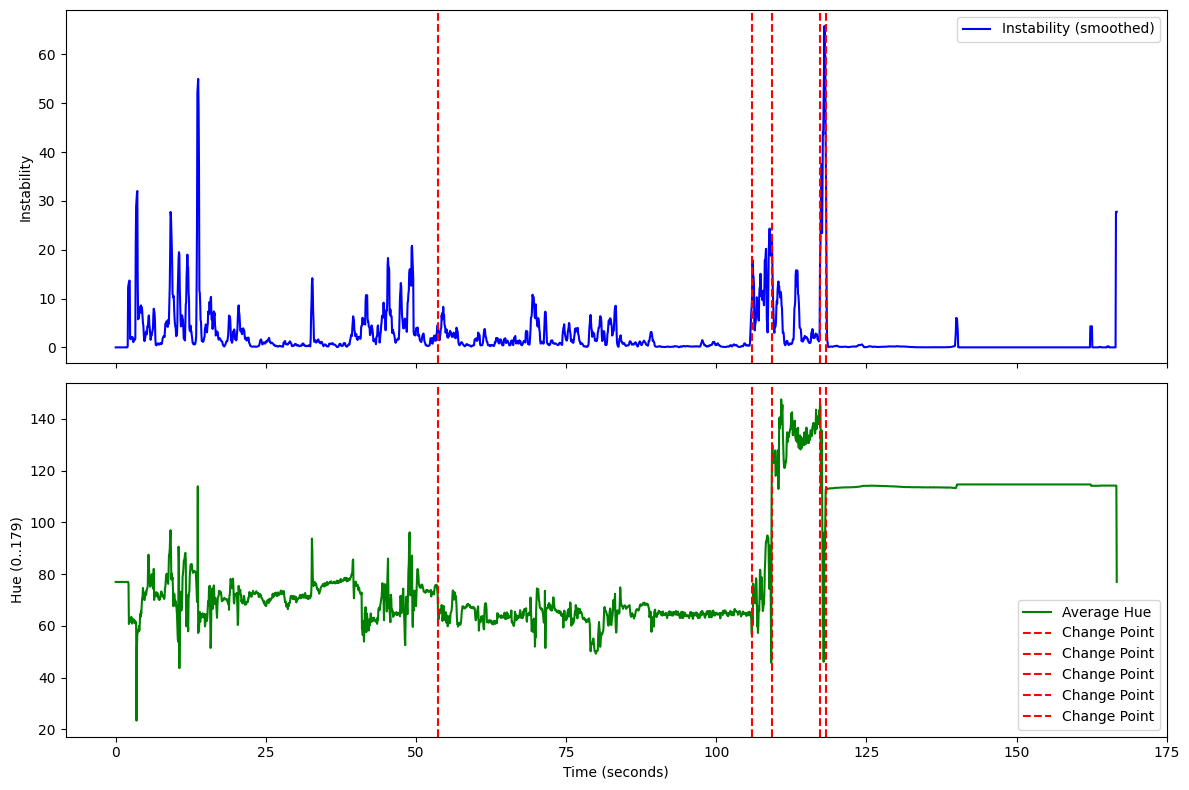

In [119]:

# Example usage:
video_path_example = video_df['Video_path'].iloc[24]
times, instability_smoothed, avg_hue = extract_instability_and_color(
    video_path_example, smoothing_window=5
)

# Combine the two features into a 2D signal for change point detection
# shape: (n_samples, n_features)
signal_2d = np.column_stack((instability_smoothed, avg_hue))

# Run Pelt on the 2D signal. "rbf" can handle multidimensional data
algo = rpt.Pelt(model="rbf").fit(signal_2d)
result = algo.predict(pen=10)  # Adjust penalty as needed
print("Detected change points (frame indices):", result)

change_point_times = [times[idx] for idx in result if idx < len(times)]
print("Detected change points (seconds):", change_point_times)

# Plot the signals and mark the change points
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Instability
ax1.plot(times, instability_smoothed, label="Instability (smoothed)", color='blue')
for cp in change_point_times:
    ax1.axvline(cp, color='red', linestyle='--')
ax1.set_ylabel("Instability")
ax1.legend()

# 2) Average Hue
ax2.plot(times, avg_hue, label="Average Hue", color='green')
for cp in change_point_times:
    ax2.axvline(cp, color='red', linestyle='--', label="Change Point")
ax2.set_ylabel("Hue (0..179)")
ax2.set_xlabel("Time (seconds)")
ax2.legend()

plt.tight_layout()
plt.show()

# a multi-step procedure that attempts to handle both short and long videos:

Check Video Duration
If the video is very short (for example, under 30 seconds), assume the entire video is relevant.
Coarse Detection
Extract an instability signal with a larger smoothing window (to dampen small spikes).
Apply a percentile-based threshold to find a broad window where activity is higher.
This step narrows down a region in long videos so that we don’t run a fine analysis over unnecessary frames.
Fine Detection
Re-extract signals for the broad window from step 2 (or simply focus your analysis on that range).
Use a smaller smoothing window to retain more detail.
Apply change point detection (for instance, Pelt with a suitable penalty) to find precise boundaries.
Feel free to modify smoothing windows, thresholds, and the penalty parameter to suit your dataset. This example uses brightness/contrast instability, but you could extend it with color features or other measures.

In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ruptures as rpt

def extract_instability_signal(video_path, smoothing_window=5):
    """
    Reads a video and computes:
      - times: timestamps in seconds
      - instability_smoothed: a smoothed measure of frame-to-frame brightness/contrast differences
      - total_duration: the length of the video in seconds
    """
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    times = []
    brightness = []
    contrast = []
    instability = []
    frame_index = 0
    prev_brightness = None
    prev_contrast = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        t = frame_index / fps if fps > 0 else frame_index
        times.append(t)
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        br = np.mean(gray)
        co = np.std(gray)

        if frame_index == 0:
            instability.append(0)
        else:
            diff_br = abs(br - prev_brightness)
            diff_co = abs(co - prev_contrast)
            inst = diff_br + diff_co
            instability.append(inst)

        prev_brightness = br
        prev_contrast = co
        frame_index += 1

    cap.release()
    times = np.array(times)
    instability = np.array(instability)

    # Smooth with a simple moving average
    window = np.ones(smoothing_window) / smoothing_window
    instability_smoothed = np.convolve(instability, window, mode='same')
    
    total_duration = times[-1] if len(times) > 0 else 0
    return times, instability_smoothed, total_duration

def coarse_detection(times, instability_smoothed, percentile_val=70):
    """
    Finds a broad region of higher activity using a percentile-based threshold.
    Returns (coarse_start, coarse_end) in seconds.
    """
    threshold = np.percentile(instability_smoothed, percentile_val)
    above = (instability_smoothed > threshold)

    if not np.any(above):
        return None

    first_idx = np.argmax(above)
    last_idx = len(above) - 1 - np.argmax(above[::-1])
    return times[first_idx], times[last_idx]

def find_procedure_window(
    video_path, 
    short_video_threshold=30, 
    coarse_smoothing_window=15, 
    coarse_percentile=70, 
    fine_smoothing_window=5, 
    pen=10
):
    """
    Multi-step approach:
      1) If total video duration < short_video_threshold, return entire duration.
      2) Else, perform a coarse detection to get a broad region of interest.
      3) Re-extract signals with a finer smoothing window and apply change point detection
         to the coarse region.
      4) Return the recommended (start, end) of the procedure.
    """
    # Step 1: Coarse extraction
    times, instability_coarse, total_duration = extract_instability_signal(
        video_path, smoothing_window=coarse_smoothing_window
    )
    if total_duration <= short_video_threshold:
        return (0, total_duration)

    coarse_bounds = coarse_detection(times, instability_coarse, percentile_val=coarse_percentile)
    if coarse_bounds is None:
        return (0, total_duration)
    coarse_start, coarse_end = coarse_bounds

    # Step 2: Fine extraction in the coarse region
    times_fine, instability_fine, _ = extract_instability_signal(
        video_path, smoothing_window=fine_smoothing_window
    )
    mask = (times_fine >= coarse_start) & (times_fine <= coarse_end)
    sub_times = times_fine[mask]
    sub_instability = instability_fine[mask]

    if len(sub_times) < 2:
        return (coarse_start, coarse_end)

    # Step 3: Change point detection on sub-region
    algo = rpt.Pelt(model="l2").fit(sub_instability)
    result = algo.predict(pen=pen)
    
    # Build segments from change points; here we simply take the segment with highest average instability
    segment_boundaries = [0] + result  # boundaries relative to sub_times
    segments = []
    for i in range(len(segment_boundaries) - 1):
        start_idx = segment_boundaries[i]
        end_idx = segment_boundaries[i+1] - 1
        if end_idx < start_idx:
            continue
        local_times = sub_times[start_idx:end_idx+1]
        local_inst = sub_instability[start_idx:end_idx+1]
        if len(local_times) > 0:
            seg_start = local_times[0]
            seg_end = local_times[-1]
            # seg_avg = np.mean(local_inst)
            # segments.append((seg_start, seg_end, seg_avg))
            seg_sum = np.sum(local_inst)
            segments.append((seg_start, seg_end, seg_sum))  # store sum instead of avg

    if not segments:
        return (coarse_start, coarse_end)
    
    # best_segment = max(segments, key=lambda x: x[2])
    best_segment = max(segments, key=lambda x: x[2])  # now picking largest sum

    fine_start, fine_end, _ = best_segment

    return (float(fine_start), float(fine_end))

# ----------------------------------------------------------------- #
# --- Example usage and visualization ---

# Pick a video from your dataframe (make sure video_df is defined and contains a 'Video_path' column)
video_path_example = video_df['Video_path'].iloc[0]

# Get the recommended procedure window using the multi-step approach.
recommended_start, recommended_end = find_procedure_window(
    video_path_example,
    short_video_threshold=30,    # 30 short videos: entire duration is relevant
    coarse_smoothing_window=15,  # 15 coarse step: heavy smoothing to identify a broad region
    coarse_percentile=70,        # 70 select region above the 70th percentile
    fine_smoothing_window=5,     # 5 fine step: less smoothing for detailed detection
    pen=10                       # 10 penalty for change point detection
)

print(f"Recommended Procedure Window: {recommended_start:.2f}s - {recommended_end:.2f}s")


Recommended Procedure Window: 187.40s - 188.33s


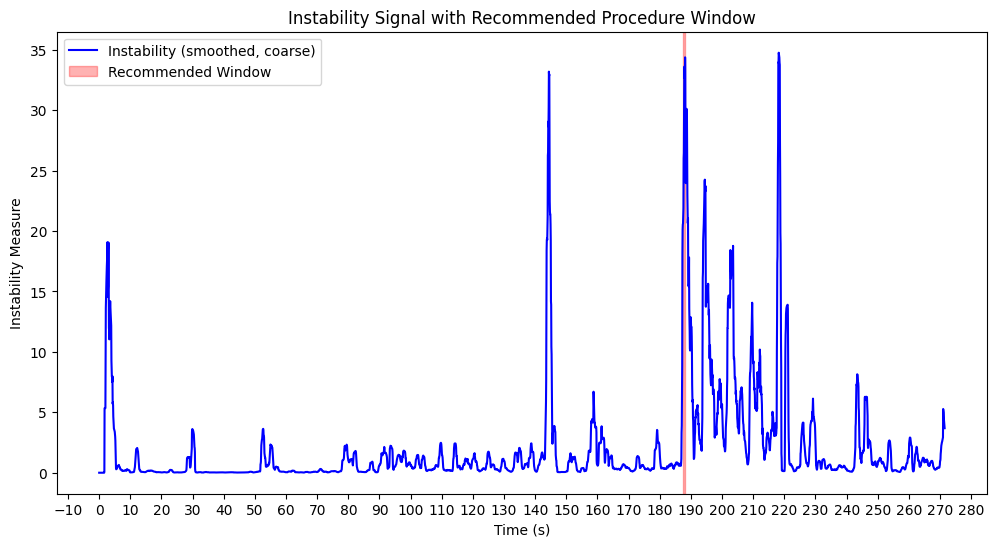

In [129]:

# For visualization, we re-extract a coarse signal for the entire video
times, instability_coarse, total_duration = extract_instability_signal(
    video_path_example, smoothing_window=15
)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(times, instability_coarse, label='Instability (smoothed, coarse)', color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Instability Measure")
ax.set_title("Instability Signal with Recommended Procedure Window")
# Shade the recommended window
ax.axvspan(recommended_start, recommended_end, color='red', alpha=0.3, label="Recommended Window")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.legend()
plt.show()


# Potential Paths forward

### 1. Deep Learning classification models to learn to differentiate between key intubation procedure frames (needed for grading of a procedure or other future ML tasks) and residual frames recorded by VLS which may be discarded from the file via auto trimmer.

### 2. Clustering Across Videos
If enough frames, clustering can be used to find a group of frames that share a similar “instability” signature without explicitly coding the thresholds.

Step-by-Step:

Collect Frame Features

For each frame in each video, create a feature vector ->
example: [brightness,contrast,hue,sat,val,instability_measure].

could add a short-term measure of how signals change over a few frames (like the sum of absolute differences from the previous 3–5 frames).

Apply Clustering Algorithm

choices: K-Means, DBSCAN, or even hierarchical clustering.
-> might discover that one or two clusters correspond to the high-motion, high-color-change procedure frames.

Inspect the clusters. If one cluster has the characteristics (high contrast, high hue changes, etc.), label it as the “procedure cluster.”
There might be multiple clusters that represent slightly different phases of the procedure - can merge them if needed.

Map Frames Back to Each Video

Once clustered all frames from all videos, could know which cluster each frame belongs to.
For each video, locate the largest contiguous block (in time) of frames that belong to the procedure cluster(s). That block is your candidate for the procedure time window.

Clip Videos

Similar to heuristic approach, store the start and end frames for that block and trim the video accordingly.

Advantages and Considerations

More flexible than a single threshold and can adapt to differences across videos.
Must confirm the cluster that represents a procedure is distinct enough from normal frames.
Clustering more computationally heavy with large frame counts - might need to sample frames (e.g., one frame per second or per half-second).
